In [127]:
import numpy as np
from oracles import f1, f2, f3

In [128]:
srno = 22221

# 1 Conjugate Gradient Descent
## 2

In [1]:
print("*"*100, "Problem 1", "*"*100)

**************************************************************************************************** Problem 1 ****************************************************************************************************


In [129]:
# Call the functions f1 with sr_no and 1 to get PD A and b

A, b = f1(srno, 1)
print("A: ", A)
print("b: ", b)

A:  [[2.37626673 0.83229223 0.6248642  0.87410062 0.22388762]
 [0.83229223 2.12527297 0.62029519 0.66906253 0.54120011]
 [0.6248642  0.62029519 2.69523595 0.27647378 0.40153497]
 [0.87410062 0.66906253 0.27647378 2.04197985 0.44878946]
 [0.22388762 0.54120011 0.40153497 0.44878946 2.58379722]]
b:  [[13.43990929]
 [16.21963782]
 [22.36924826]
 [10.59773762]
 [23.01595542]]


In [130]:
def conjugate_gradient_method(Q, b):
    n = len(b)
    k = 1
    x = np.random.rand(n).reshape(n, 1)
    d = -Q @ x - b
    # Check if Q is a square matrix
    if Q.shape[0] != Q.shape[1]:
        raise ValueError("Matrix is not square")
    # Check if Q is symmetric
    if not np.allclose(Q, Q.T): # Checks Q is symmetric by comparing it with its transpose
        raise ValueError("Matrix is not symmetric")
    # Check if Q is positive definite
    if not np.all(np.linalg.eigvals(Q) > 0): # Checks if all eigenvalues are positive
        raise ValueError("Matrix is not positive definite")
    # Check the dimensions of b
    if Q.shape[0] != len(b):
        raise ValueError("Dimensions of Q and b do not match")

    num_iter = 0

    while True:
        alpha = -(d.T @ (Q @ x + b)) / (d.T @ Q @ d)
        x_next = x + alpha * d
        beta = ((Q @ x_next + b).T @ (Q @ x_next + b)) / ((Q @ x + b).T @ (Q @ x + b))
        d_next = -Q @ x_next - b + beta * d
        
        x = x_next
        d = d_next
        k += 1
        num_iter += 1

        if np.linalg.norm(Q @ x + b) == 0 or k == n + 1:
            break

    x_star = x
    
    return x_star, num_iter

In [131]:
print(conjugate_gradient_method(A, b))

(array([[-2.],
        [-3.],
        [-6.],
        [-1.],
        [-7.]]),
 5)

## 4

In [132]:
C, d = f1(srno, 0)
print("C: ", C)
print("d: ", d)
print(C.shape)
print(d.shape)

C:  [[-0.16177801  0.4747092   0.02262154  0.11493448 -0.18700717]
 [-0.38829825 -0.30701942 -0.11113239  0.34990483 -0.05565299]
 [-0.39375229  0.25641652 -0.13358702 -0.44528765  0.30595581]
 [-0.41193314  0.00991183  0.33645171 -0.52614724 -0.1939394 ]
 [-0.07930818  0.08323402 -0.48934389  0.30657495 -0.01336436]
 [-0.3819175   0.05158702  0.13499331  0.25904904  0.66405732]
 [-0.14567738  0.46377756  0.23130874  0.35461831  0.0826298 ]
 [-0.37971284 -0.0012951   0.27212566  0.27465792 -0.57538836]
 [-0.4220443  -0.42535546 -0.39682085 -0.0811474  -0.05565843]
 [-0.05144584  0.45709395 -0.55981165 -0.14273763 -0.2203669 ]]
d:  [[ 1.19994608]
 [ 1.17322373]
 [-2.49606484]
 [-6.49915296]
 [ 2.78343848]
 [ 5.04265403]
 [ 4.70469172]
 [-1.16833148]
 [-3.1287737 ]
 [-1.11808303]]
(10, 5)
(10, 1)


In [133]:
# Call the function conjugate_gradient_method
# on C^T C and C^T d to get the solution of the equations
print(conjugate_gradient_method(C.T @ C, C.T @ d))

(array([[-2.00000000e+00],
        [-3.00000000e+00],
        [-3.58075015e-16],
        [-9.00000000e+00],
        [-5.00000000e+00]]),
 5)

In [ ]:
print("*"*100, "Problem 2", "*"*100)

# 2 Newton's Method

In [134]:
def f2_value(x):
    return f2(x, srno, 0) # returns the value of f2 which is a real number

def f2_gradient(x):
    return f2(x, srno, 1) # returns the gradient of f2 which is a numpy array

def Newton_update_term(x):
    return f2(x, srno, 2) # returns the Hessian of f2 which is a numpy array

In [135]:
x_0 = np.array([0, 0, 0, 0, 0])

## 1

In [136]:
def gradient_descent(f, grad_f, x_0, step_size, f_values, max_iter):
    x = np.array(x_0, dtype=np.float64)
    f_values.append(f(x))
    for i in range(max_iter):
        grad = grad_f(x)
        x = x - step_size * grad
        f_values.append(f(x))
    return x, f_values

Final x: [0.1814332  0.1814332  0.1814332  0.1814332  0.09520785]
Final f(x): -1.4104691303093915
gradient norm:  3.39698022503573
**************************************************
Final x: [0.86738044 0.86738044 0.86738044 0.86738044 0.63396766]
Final f(x): -4.362658376148133
gradient norm:  0.6445050973805453
**************************************************
Final x: [0.99997344 0.99997344 0.99997344 0.99997344 0.99407947]
Final f(x): -4.499982470844842
gradient norm:  0.005921482447445214
**************************************************
Final x: [1.         1.         1.         1.         0.99997344]
Final f(x): -4.499999999647246
gradient norm:  2.656139890017905e-05
**************************************************
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
**************************************************


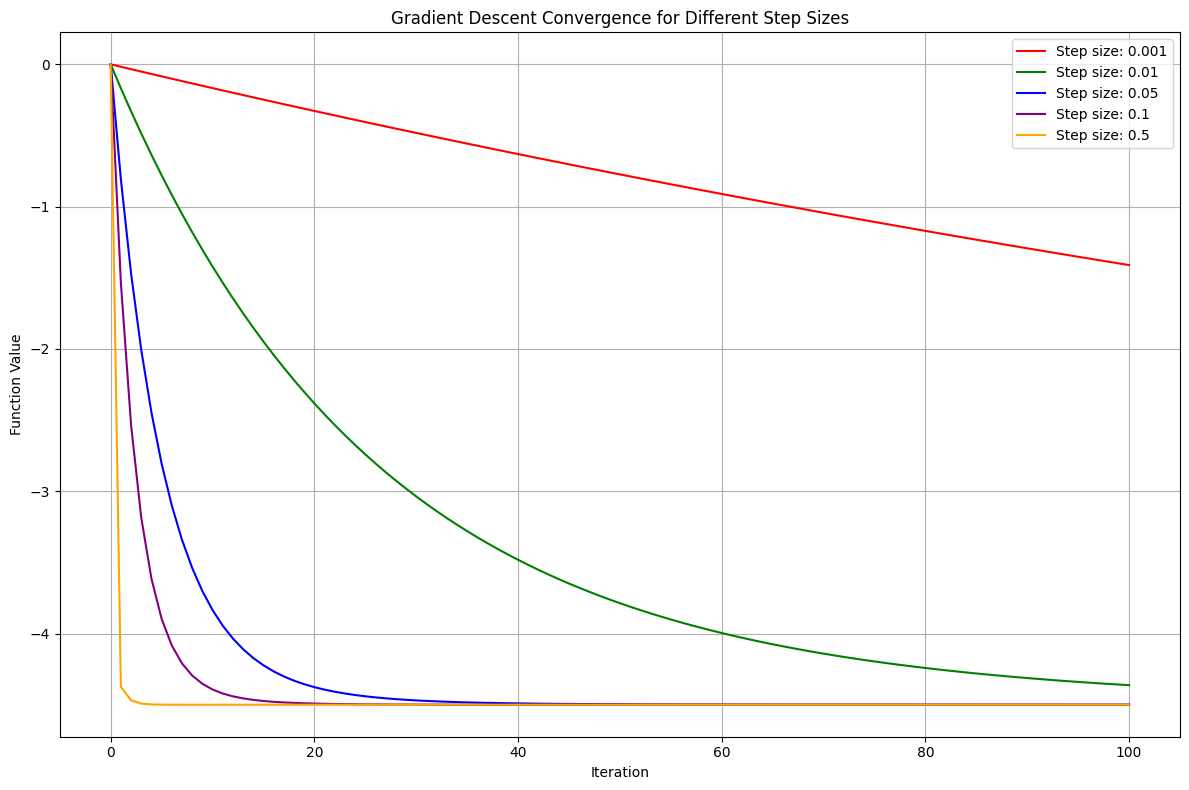

In [137]:
import matplotlib.pyplot as plt

step_size_list = [1e-3, 1e-2, 0.05, 0.1, 0.5]
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.figure(figsize=(12, 8))

for step_size, color in zip(step_size_list, colors):
    x_final, f_values = gradient_descent(f2_value, f2_gradient, x_0, step_size, [], 100)
    print(f'Final x: {x_final}')
    print(f'Final f(x): {f2_value(x_final)}')
    print("gradient norm: ", np.linalg.norm(f2_gradient(x_final)))
    print("*"*50)
    iterations = range(len(f_values))
    plt.plot(iterations, f_values, color=color, label=f'Step size: {step_size}')

plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Gradient Descent Convergence for Different Step Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2

In [138]:
def Newton(f, Newton_update_term, x_0, f_values, max_iter):
    x = np.array(x_0, dtype=np.float64)
    f_values.append(f(x))
    for i in range(max_iter):
        x = x - Newton_update_term(x)
        f_values.append(f(x))
    return x, f_values

Final x: [1. 1. 1. 1. 1.]


Final f(x): -4.5
gradient norm:  0.0
**************************************************


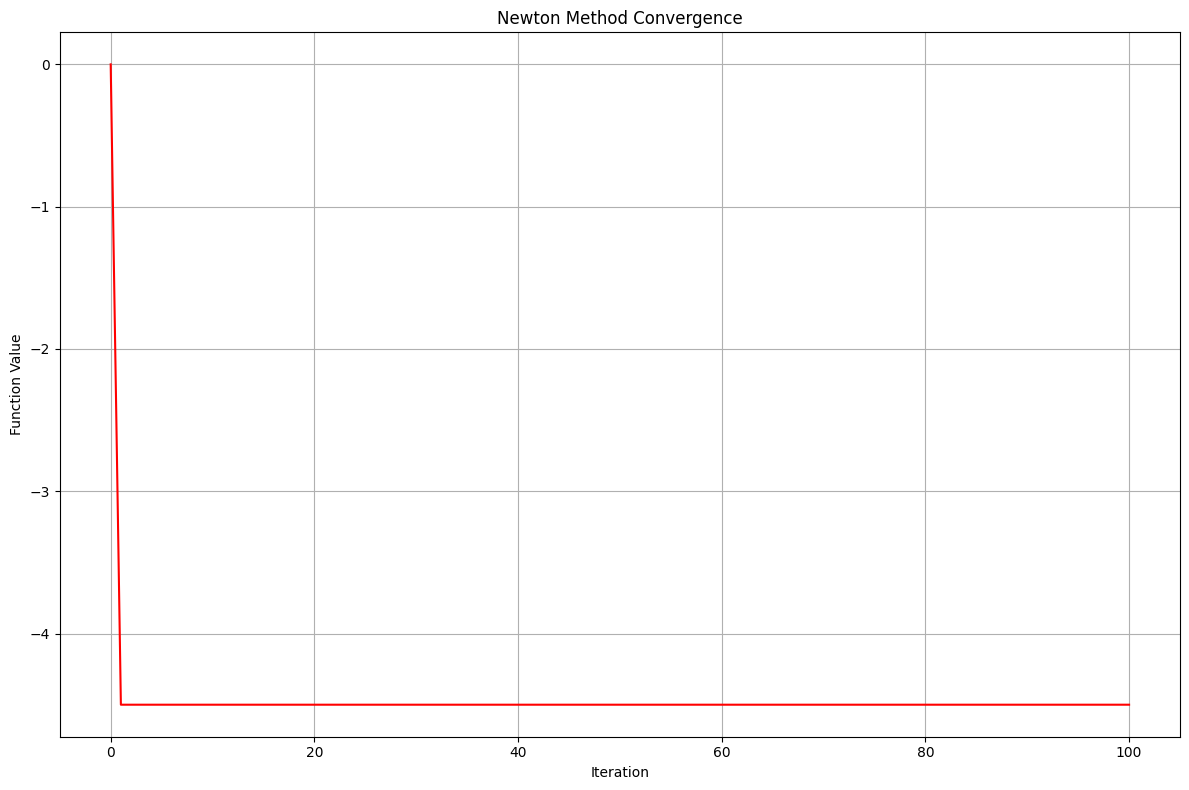

In [139]:
x_final, f_values = Newton(f2_value, Newton_update_term, x_0, [], 100)
print(f'Final x: {x_final}')
print(f'Final f(x): {f2_value(x_final)}')
print("gradient norm: ", np.linalg.norm(f2_gradient(x_final)))
print("*"*50)
iterations = range(len(f_values))
plt.figure(figsize=(12, 8))
plt.plot(iterations, f_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Newton Method Convergence')
plt.grid(True)
plt.tight_layout()
plt.show()

The Newton's method converged to the solution in 1 iterations
-1.7402664514594932
-4.5
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
**************************************************
The Newton's method converged to the solution in 1 iterations
-3.233110350375185
-4.5
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
**************************************************
The Newton's method converged to the solution in 1 iterations
-2.6611154471179033
-4.5
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
**************************************************
The Newton's method converged to the solution in 1 iterations
-2.9772735289174235
-4.5
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
**************************************************
The Newton's method converged to the solution in 1 iterations
-3.330103428655155
-4.5
Final x: [1. 1. 1. 1. 1.]
Final f(x): -4.5
gradient norm:  0.0
************************************************

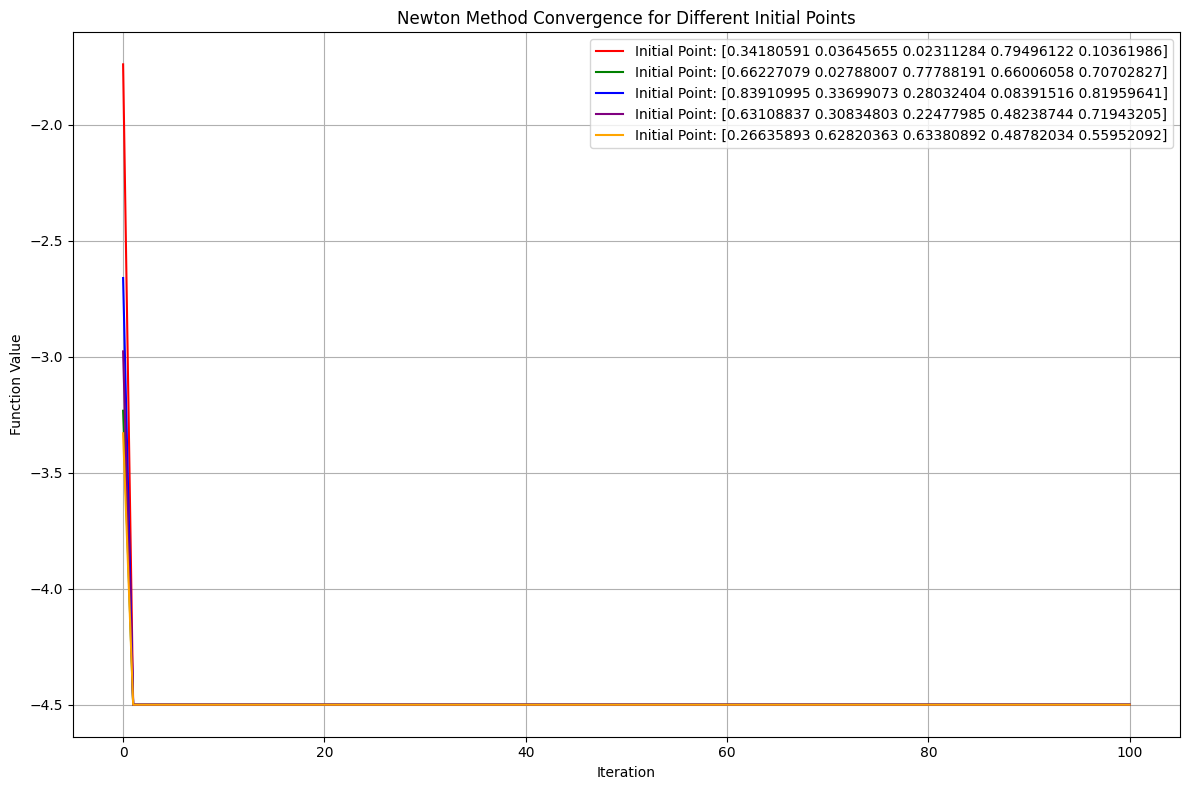

In [141]:
# Generate a list of 5 random initial points, each containing 5 values
initial_point_list = [np.random.rand(5) for _ in range(5)]
plt.figure(figsize=(12, 8))

for initial_point, color in zip(initial_point_list, colors):
    x_final, f_values = Newton(f2_value, Newton_update_term, initial_point, [], 100)
    # Find the first i such that f_values[i] == -4.5

    for i in range(len(f_values)):
        if f_values[i] == -4.5:
            print("The Newton's method converged to the solution in", i, "iterations")
            break

    print(f_values[0])
    print(f_values[1])
    print(f'Final x: {x_final}')
    print(f'Final f(x): {f2_value(x_final)}')
    print("gradient norm: ", np.linalg.norm(f2_gradient(x_final)))
    print("*"*50)
    iterations = range(len(f_values))
    plt.plot(iterations, f_values, color=color, label=f'Initial Point: {initial_point}')

plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Newton Method Convergence for Different Initial Points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("*"*100, "Problem 3", "*"*100)

# 3 Newton’s Method continued

## 1

In [142]:
def f3_value(x):
    return f3(x, srno, 0) # returns the value of f3 which is a real number

def f3_gradient(x):
    return f3(x, srno, 1) # returns the gradient of f3 which is a numpy array

def f3_Newton_update_term(x):
    return f3(x, srno, 2) # returns the Hessian of f3 which is a numpy array

x_0 = np.array([1, 1, 1, 1, 1])

Final x: [-4.79441025e-01  2.17408789e-17  2.17408789e-17  2.17408789e-17
  3.19757550e-05]
Final f(x): 7.08773661132298
gradient norm:  8.996784413067298


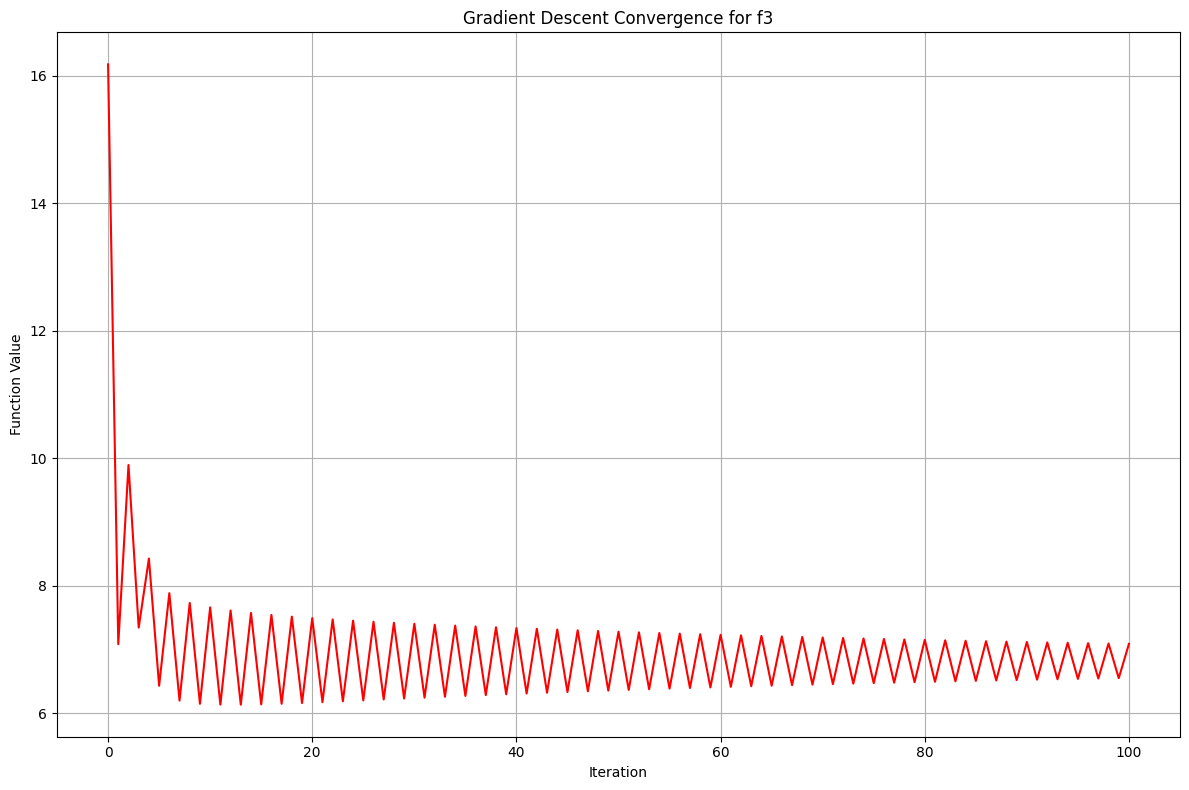

In [143]:
x, f3_values = gradient_descent(f3_value, f3_gradient, x_0, 0.1, [], 100)

print(f'Final x: {x}')
print(f'Final f(x): {f3_value(x)}')
print("gradient norm: ", np.linalg.norm(f3_gradient(x)))

iterations = range(len(f3_values))
plt.figure(figsize=(12, 8))
plt.plot(iterations, f3_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Gradient Descent Convergence for f3')
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
min_f3 = min(f3_values)
print(f'Minimum of f3 in Gradient descent: {min_f3}')

Minimum of f3 in Gradient descent: 6.1331442462800325


## 3

In [145]:
x_Newton_f3, f3_values_Newton = Newton(f3_value, f3_Newton_update_term, x_0, [], 100)
print(f3_values_Newton[:10])

[np.float64(16.18137781002638), np.float64(inf), np.float64(inf), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]


[np.float64(3.890162237107524), np.float64(3.620687625948484), np.float64(3.4744917980362544), np.float64(3.465737115158705), np.float64(3.4657359027997265), np.float64(3.4657359027997265), np.float64(3.4657359027997265), np.float64(3.4657359027997265), np.float64(3.4657359027997265), np.float64(3.4657359027997265)]


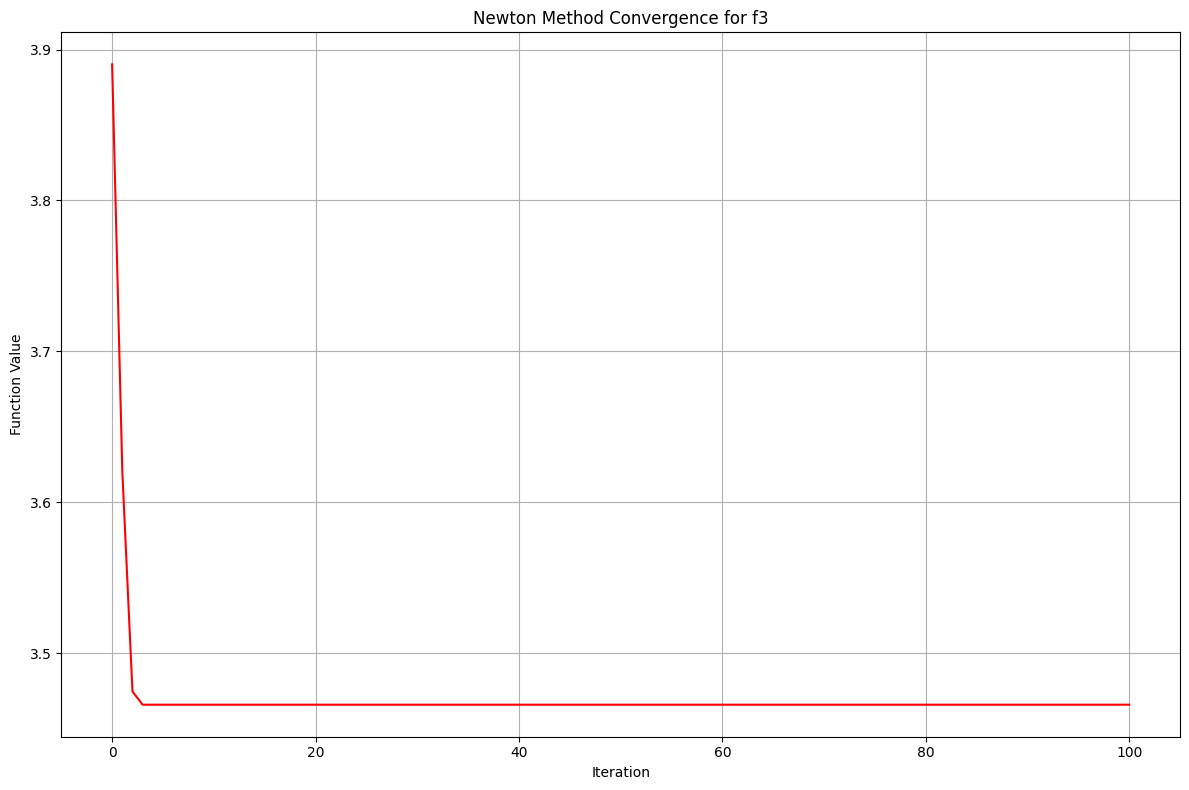

Minimum of f3 in Newton method: 3.4657359027997265
Gradient norm at the minimum value of f3 in Newton method: 0.0


In [146]:
x_Newton_f3, f3_values_Newton = Newton(f3_value, f3_Newton_update_term, np.array([0.1, 0.1, 0.1, 0.1, 0.1]), [], 100)
print(f3_values_Newton[:10])

# Plot f3_values_Newton
iterations = range(len(f3_values_Newton))
plt.figure(figsize=(12, 8))
plt.plot(iterations, f3_values_Newton, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Newton Method Convergence for f3')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the minimum value of f3 using Newton's method
min_f3_Newton = min(f3_values_Newton)
print(f'Minimum of f3 in Newton method: {min_f3_Newton}')

# Find the gradient norm at the minimum value of f3 using Newton's method
min_f3_index = f3_values_Newton.index(min_f3_Newton)
min_f3_x = x_Newton_f3
min_f3_gradient = np.linalg.norm(f3_gradient(min_f3_x))
print(f'Gradient norm at the minimum value of f3 in Newton method: {min_f3_gradient}')

norm of the gradinet at origin:  0.0


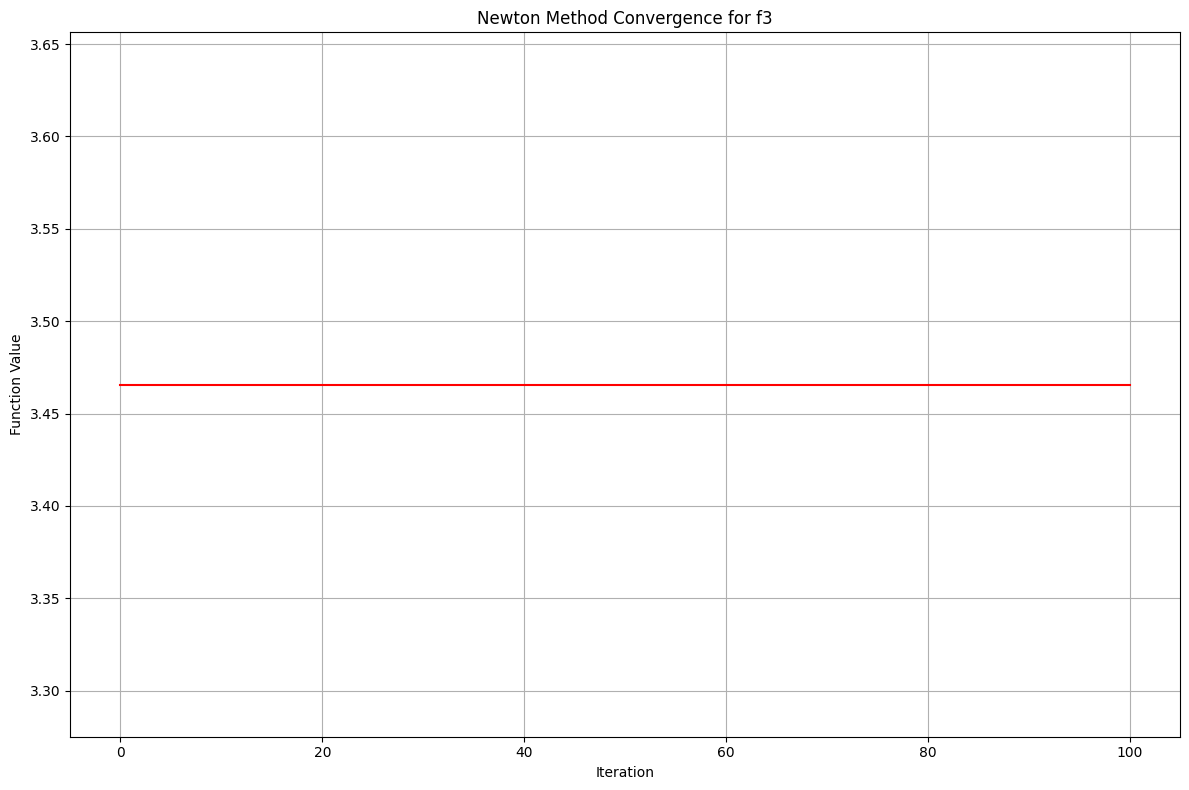

Minimum of f3 in Newton method: 3.4657359027997265
Gradient norm at the minimum value of f3 in Newton method: 0.0


In [147]:
x_Newton_f3, f3_values_Newton = Newton(f3_value, f3_Newton_update_term, np.array([0, 0, 0, 0, 0]), [], 100)
# Find the gradient norm at the minimum value of (0, 0, 0, 0, 0)
print("norm of the gradinet at origin: ", np.linalg.norm(f3_gradient(np.array([0, 0, 0, 0, 0]))))

# Plot f3_values_Newton
iterations = range(len(f3_values_Newton))
plt.figure(figsize=(12, 8))
plt.plot(iterations, f3_values_Newton, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Newton Method Convergence for f3')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the minimum value of f3 using Newton's method
min_f3_Newton = min(f3_values_Newton)
print(f'Minimum of f3 in Newton method: {min_f3_Newton}')

# Find the gradient norm at the minimum value of f3 using Newton's method
min_f3_index = f3_values_Newton.index(min_f3_Newton)
min_f3_x = x_Newton_f3
min_f3_gradient = np.linalg.norm(f3_gradient(min_f3_x))
print(f'Gradient norm at the minimum value of f3 in Newton method: {min_f3_gradient}')

## 4

In [148]:
K = [0, 10, 30, 70, 100]

Step size: 0.01
k: 0
Final x: [           nan            nan            nan            nan
 3.26886956e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 16.18137781002638


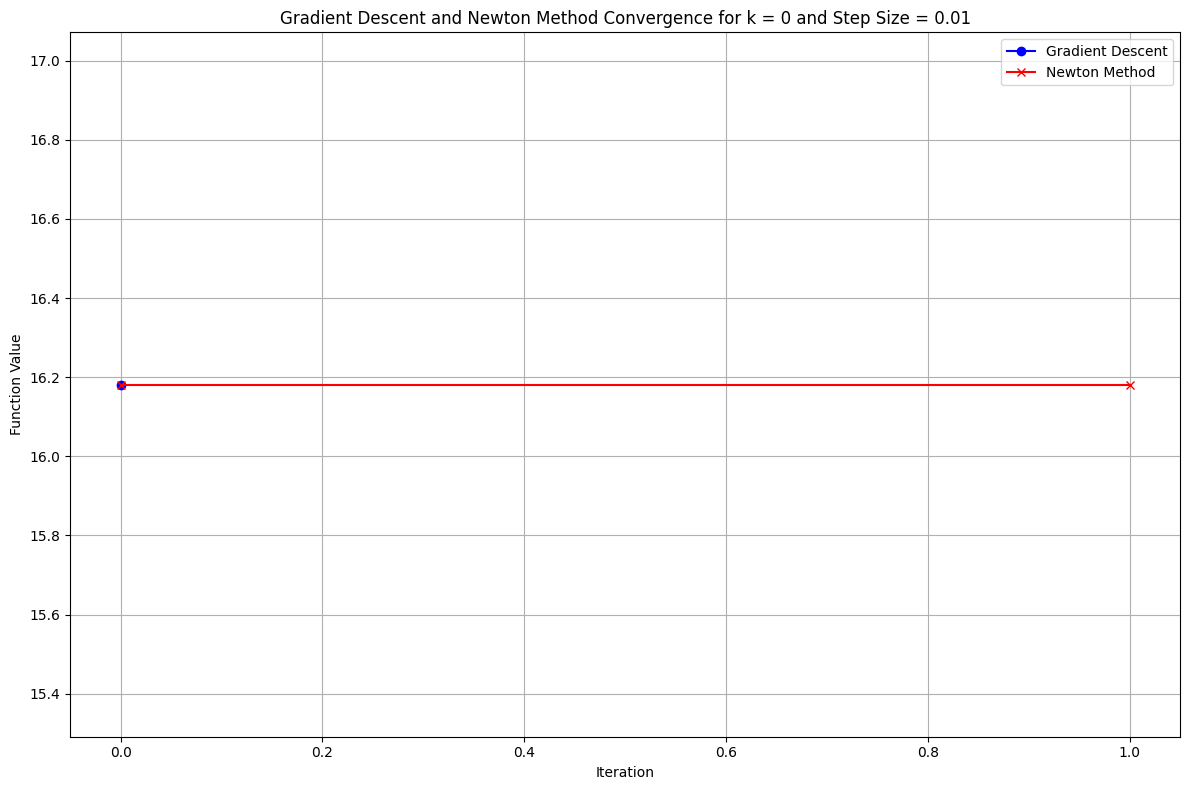

****************************************************************************************************
Step size: 0.01
k: 10
Final x: [3.45867081e-18            nan            nan            nan
 5.49795851e-18]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 7.147199887352634


<Figure size 640x480 with 0 Axes>

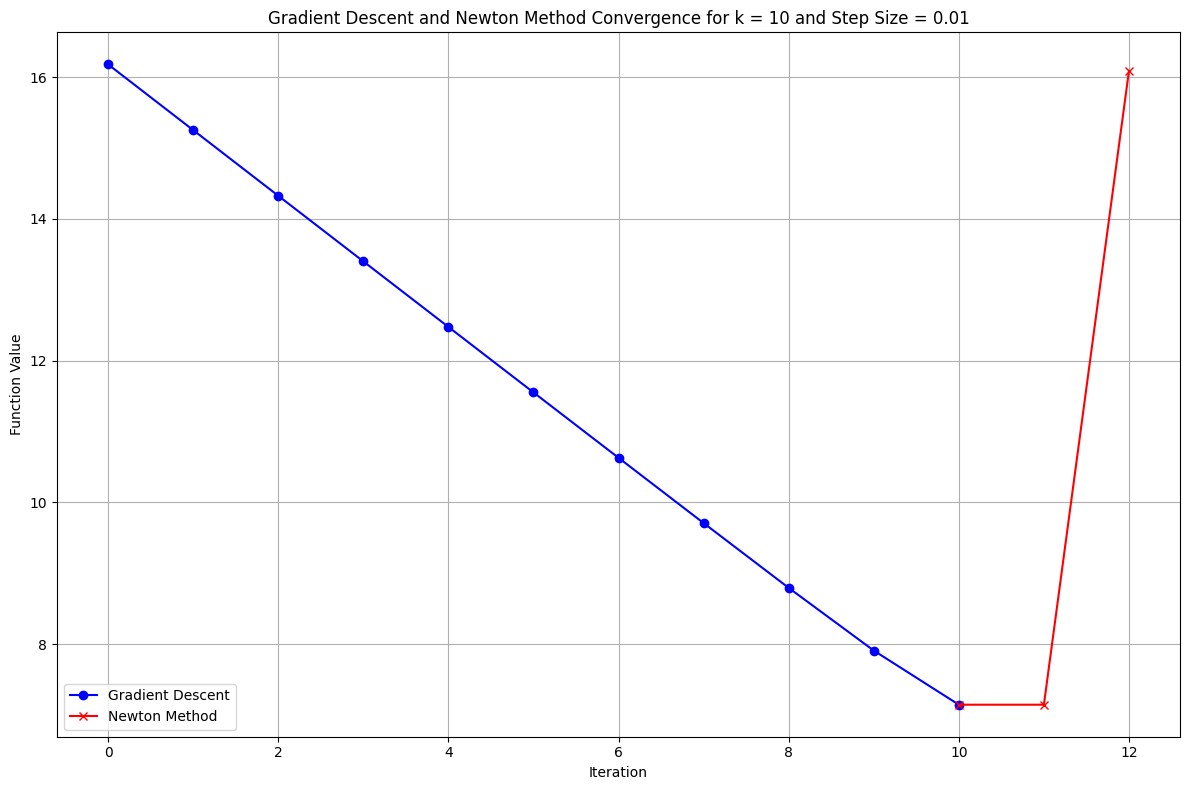

****************************************************************************************************
Step size: 0.01
k: 30
Final x: [6.02675587e-19 1.01932474e-18 1.01932474e-18 1.01932474e-18
 3.28309970e-17]
Final f(x): 3.4657359027997265
gradient norm:  0.0
Minimum of f3: 3.4657359027997265


<Figure size 640x480 with 0 Axes>

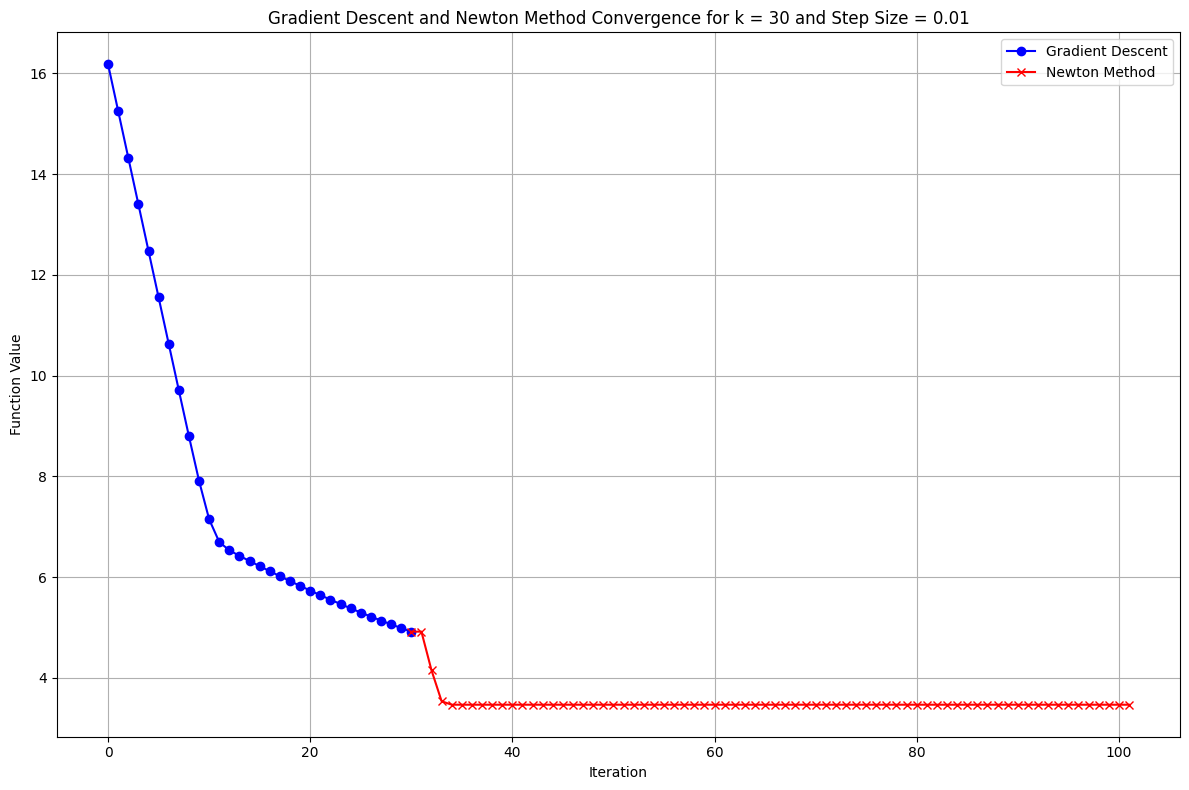

****************************************************************************************************
Step size: 0.01
k: 70
Final x: [-1.12433801e-18  7.55614269e-18  7.55614269e-18  7.55614269e-18
  2.95094984e-17]
Final f(x): 3.4657359027997265
gradient norm:  0.0
Minimum of f3: 3.4657359027997265


<Figure size 640x480 with 0 Axes>

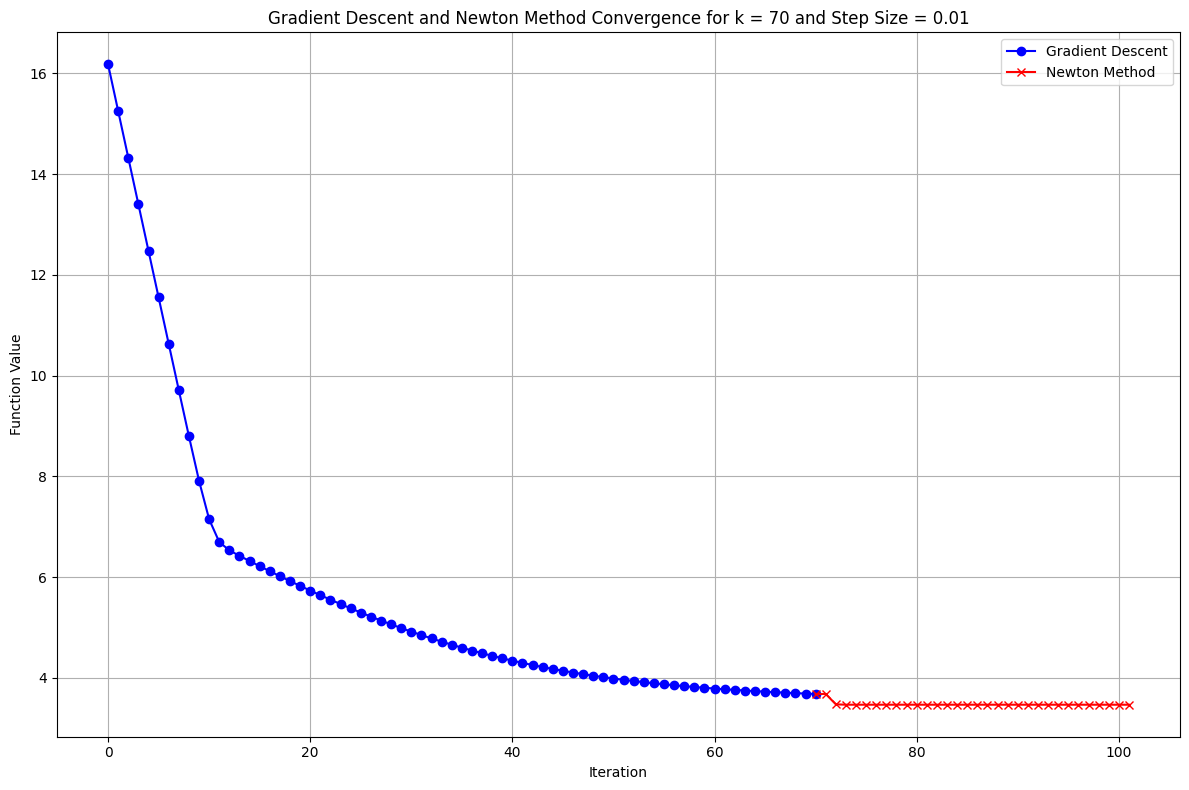

****************************************************************************************************
Step size: 0.01
k: 100
Final x: [-1.12433801e-18  3.14217271e-02  3.14217271e-02  3.14217271e-02
  4.18588040e-01]
Final f(x): 3.556819066367237
gradient norm:  0.45152791394541214
Minimum of f3: 3.556819066367237


<Figure size 640x480 with 0 Axes>

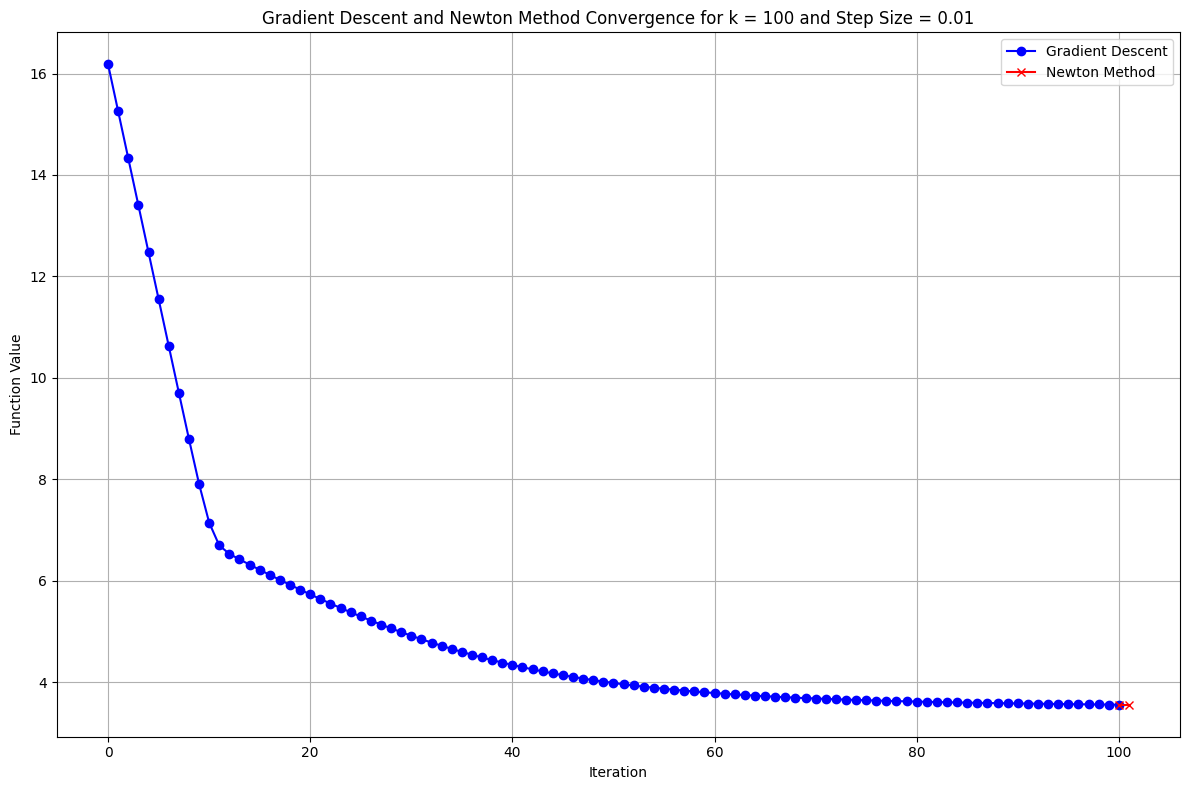

****************************************************************************************************
Step size: 0.02
k: 0
Final x: [           nan            nan            nan            nan
 3.26886956e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 16.18137781002638


<Figure size 640x480 with 0 Axes>

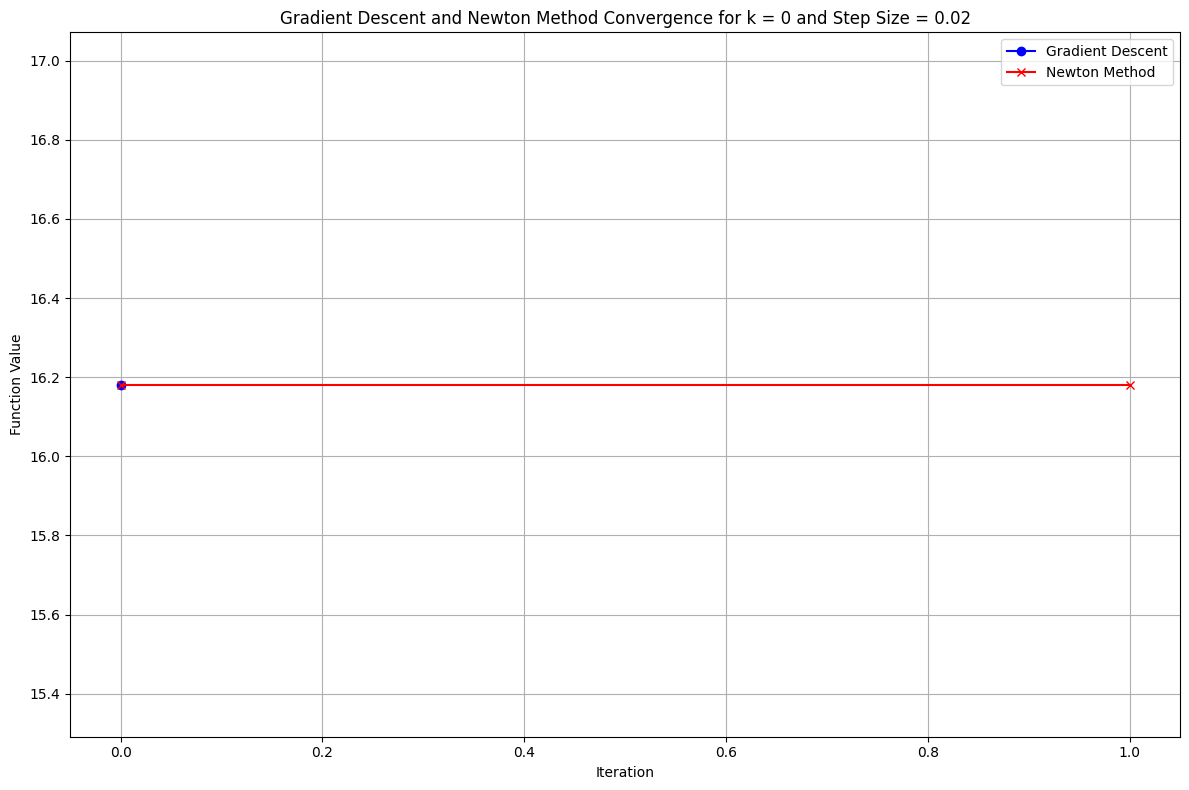

****************************************************************************************************
Step size: 0.02
k: 10
Final x: [3.91846853e-19            nan            nan            nan
 2.68885720e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 5.727385383254155


<Figure size 640x480 with 0 Axes>

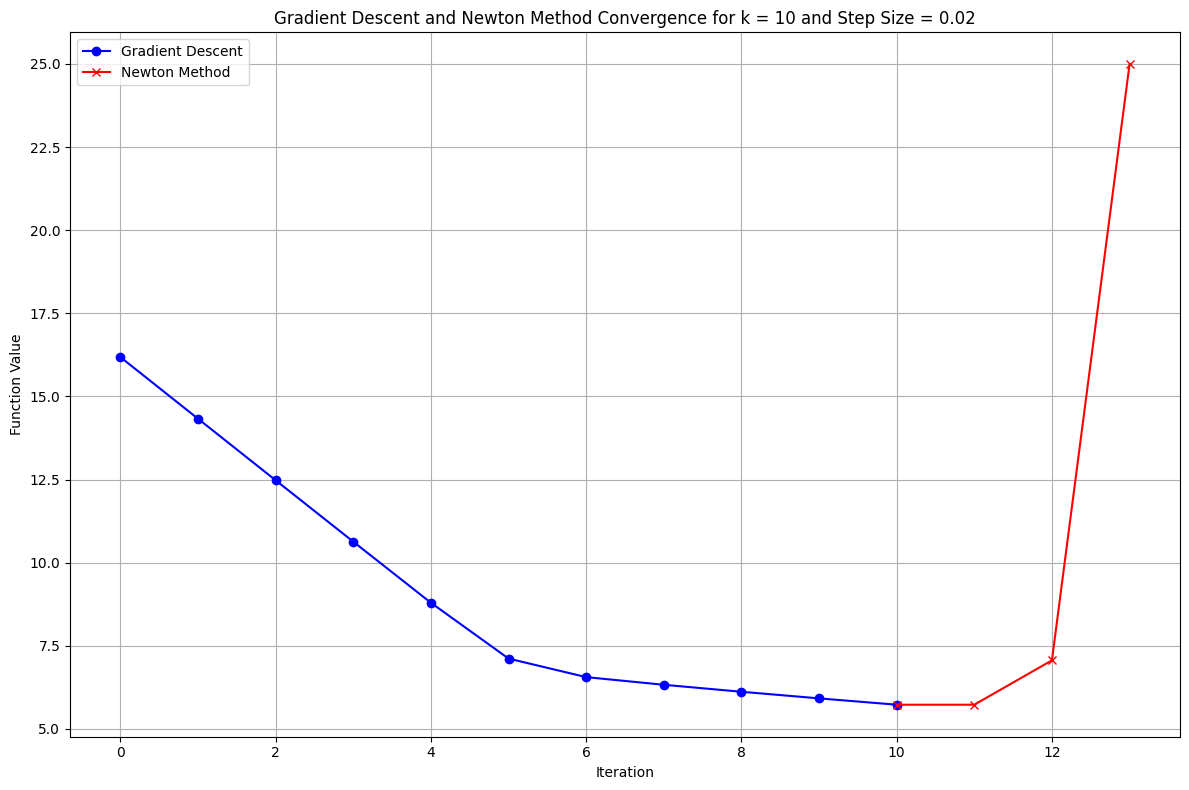

****************************************************************************************************
Step size: 0.02
k: 30
Final x: [ 4.03664139e-18  1.22396261e-19  1.22396261e-19  1.22396261e-19
 -7.10697535e-18]
Final f(x): 3.4657359027997265
gradient norm:  0.0
Minimum of f3: 3.4657359027997265


<Figure size 640x480 with 0 Axes>

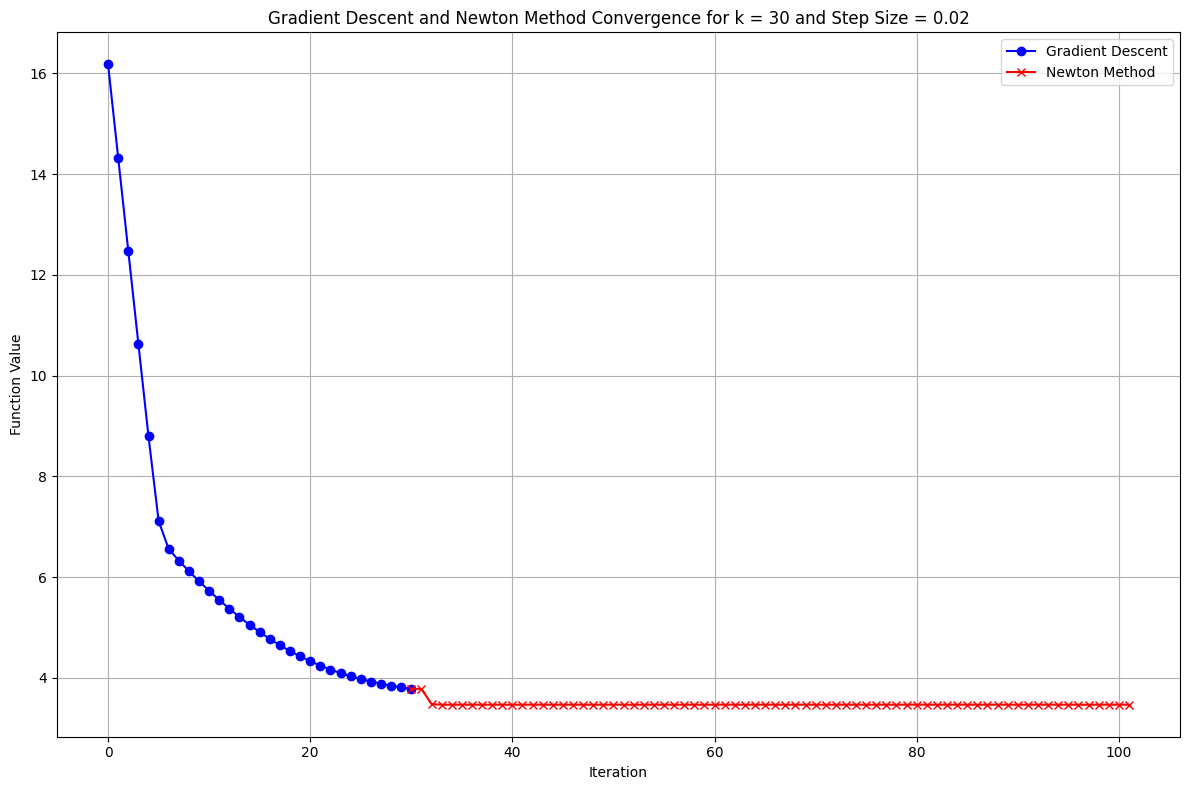

****************************************************************************************************
Step size: 0.02
k: 70
Final x: [-2.11787047e-18  1.16592497e-17  1.16592497e-17  1.16592497e-17
 -3.68628739e-18]
Final f(x): 3.4657359027997265
gradient norm:  0.0
Minimum of f3: 3.4657359027997265


<Figure size 640x480 with 0 Axes>

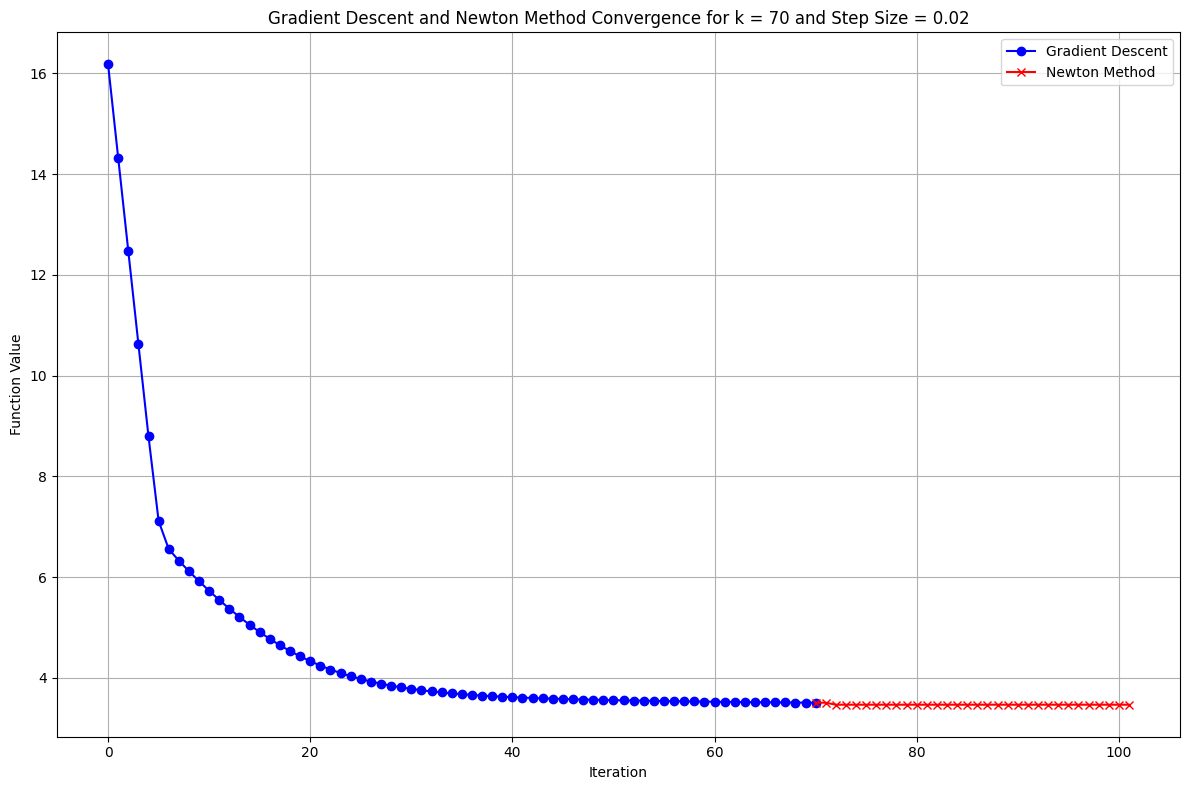

****************************************************************************************************
Step size: 0.02
k: 100
Final x: [4.54346768e-18 4.59157320e-04 4.59157320e-04 4.59157320e-04
 1.55894430e-01]
Final f(x): 3.477839801169381
gradient norm:  0.15467639887375043
Minimum of f3: 3.477839801169381


<Figure size 640x480 with 0 Axes>

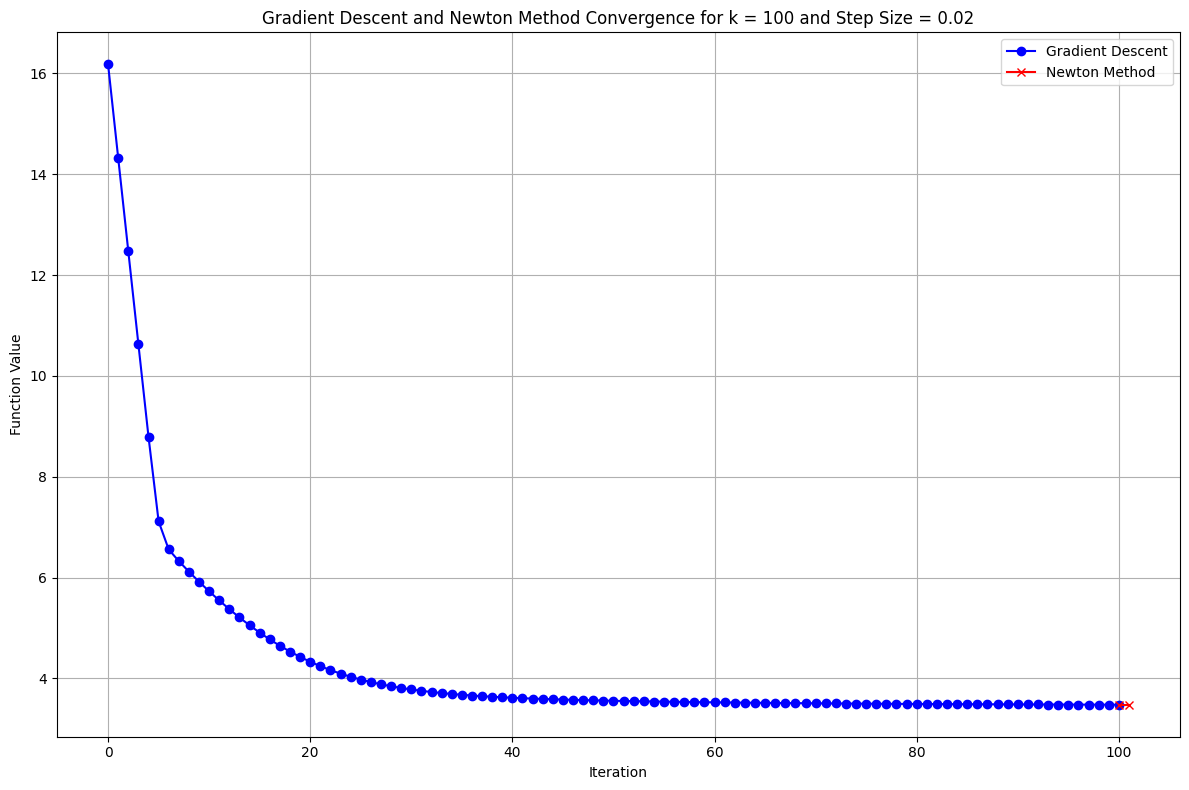

****************************************************************************************************
Step size: 0.1
k: 0
Final x: [           nan            nan            nan            nan
 3.26886956e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 16.18137781002638


<Figure size 640x480 with 0 Axes>

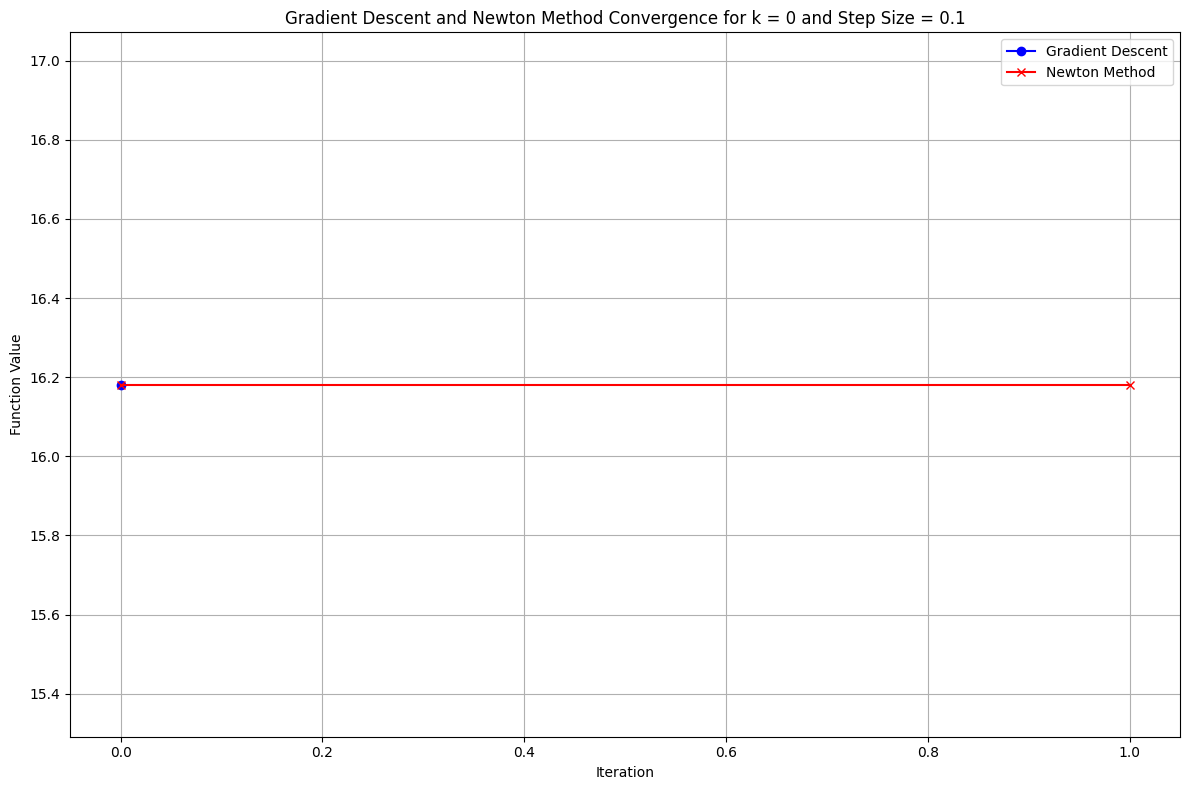

****************************************************************************************************
Step size: 0.1
k: 10
Final x: [           nan 2.68560266e-17 2.68560266e-17 2.68560266e-17
 4.18773093e-18]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.147134380299124


<Figure size 640x480 with 0 Axes>

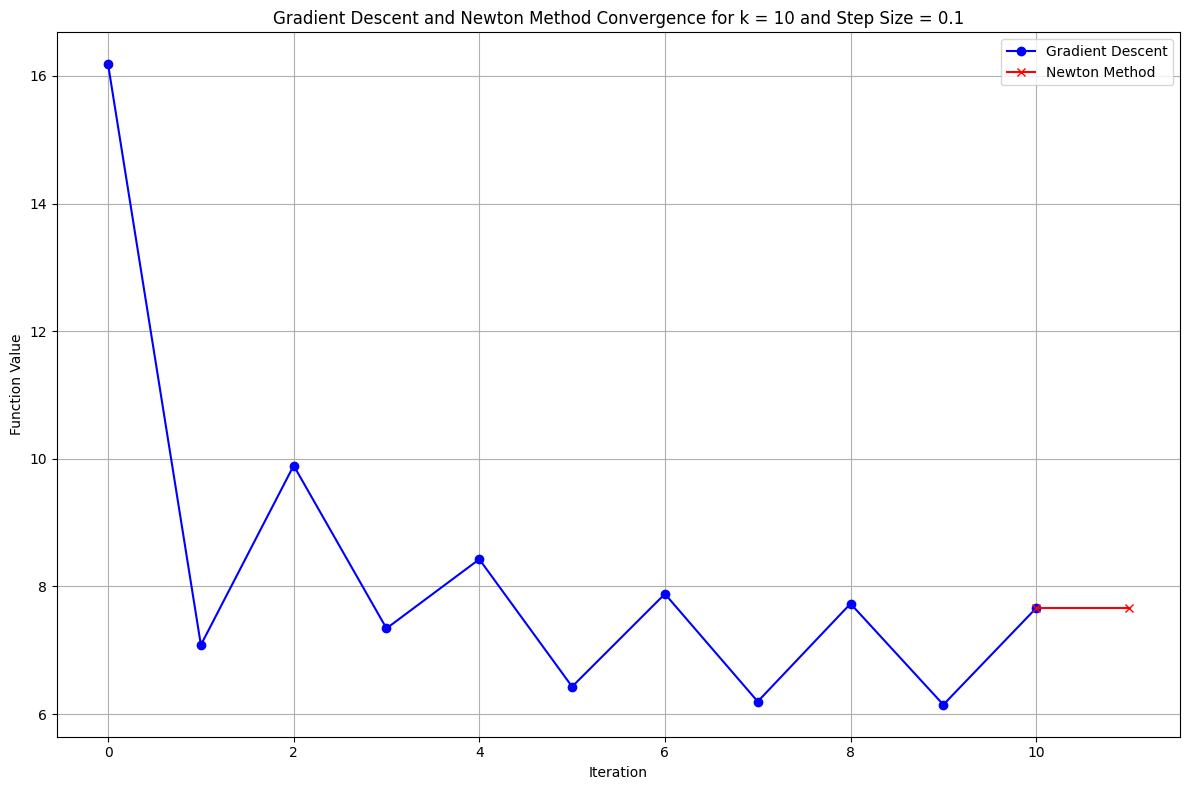

****************************************************************************************************
Step size: 0.1
k: 30
Final x: [           nan 2.57316963e-17 2.57316963e-17 2.57316963e-17
 4.80301565e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.1331442462800325


<Figure size 640x480 with 0 Axes>

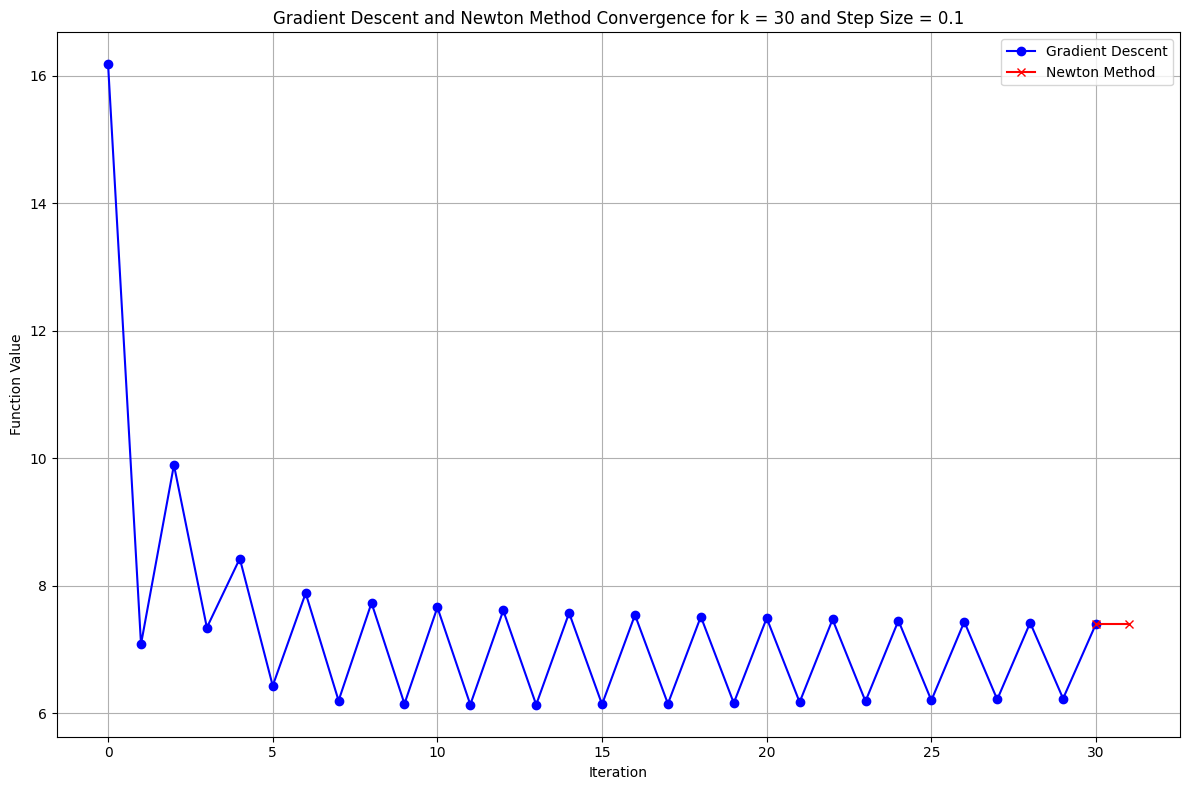

****************************************************************************************************
Step size: 0.1
k: 70
Final x: [           nan 2.17408789e-17 2.17408789e-17 2.17408789e-17
 2.94637424e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.1331442462800325


<Figure size 640x480 with 0 Axes>

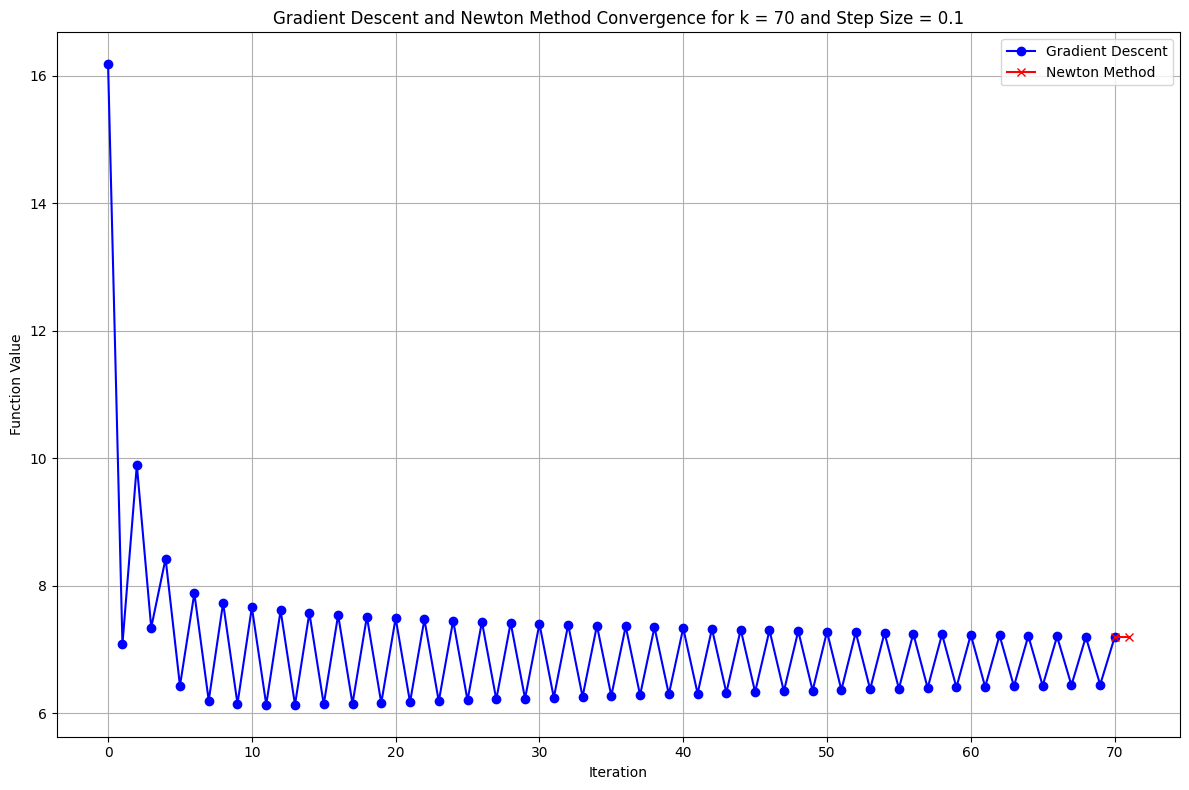

****************************************************************************************************
Step size: 0.1
k: 100
Final x: [-4.79441025e-01  2.17408789e-17  2.17408789e-17  2.17408789e-17
  3.19757550e-05]
Final f(x): 7.08773661132298
gradient norm:  8.996784413067298
Minimum of f3: 6.1331442462800325


<Figure size 640x480 with 0 Axes>

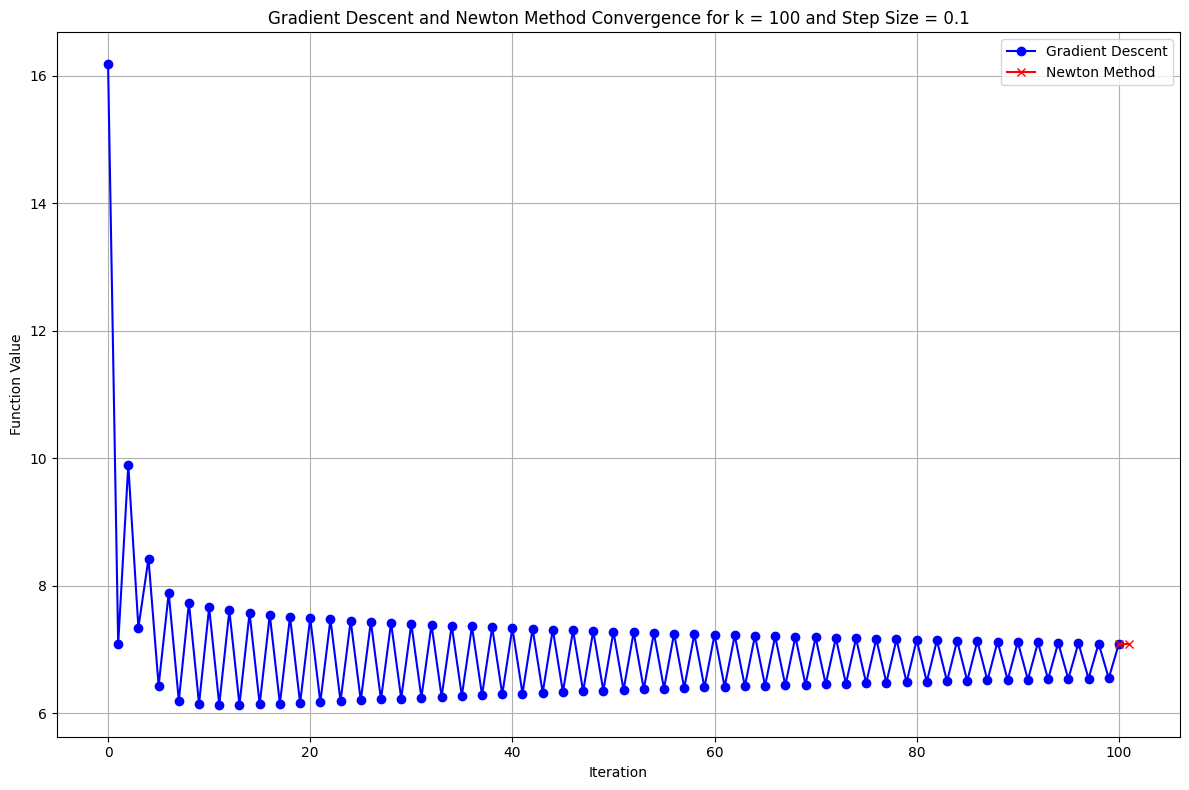

****************************************************************************************************
Step size: 0.15
k: 0
Final x: [           nan            nan            nan            nan
 3.26886956e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 16.18137781002638


<Figure size 640x480 with 0 Axes>

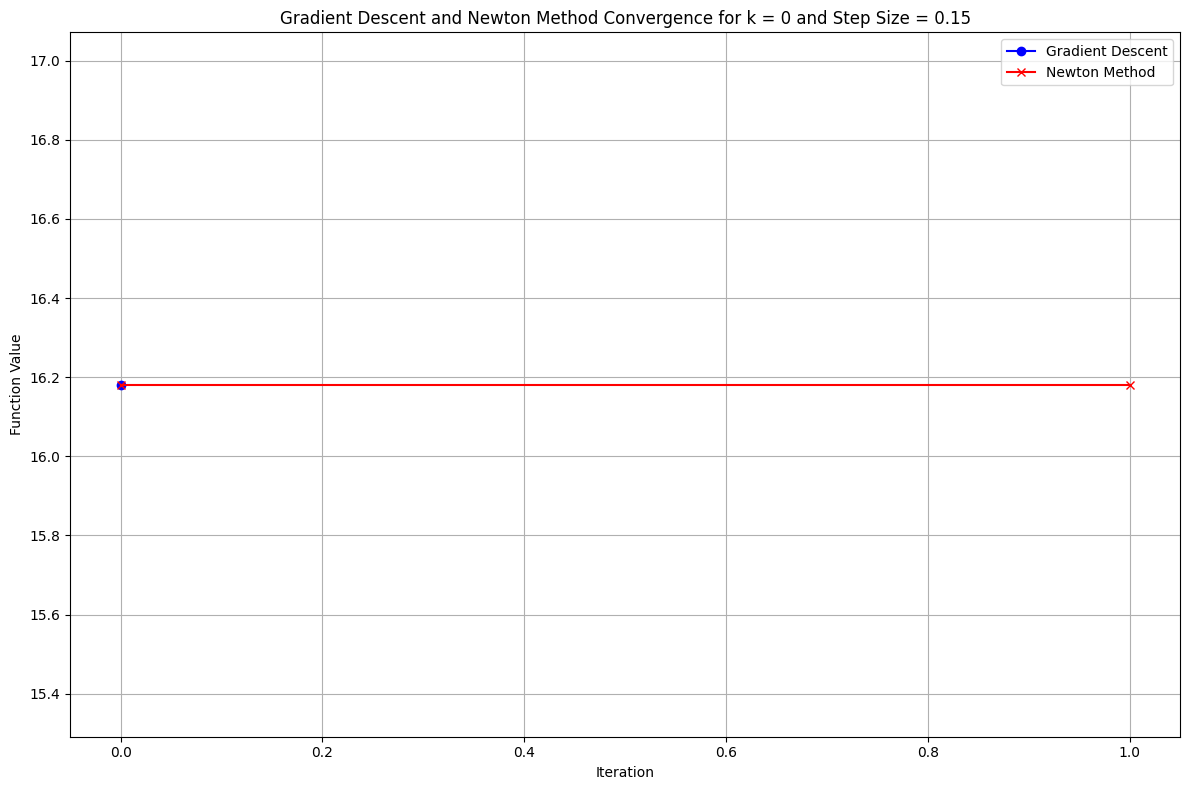

****************************************************************************************************
Step size: 0.15
k: 10
Final x: [           nan 4.58357435e-18 4.58357435e-18 4.58357435e-18
 1.20270208e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.117578031416803


<Figure size 640x480 with 0 Axes>

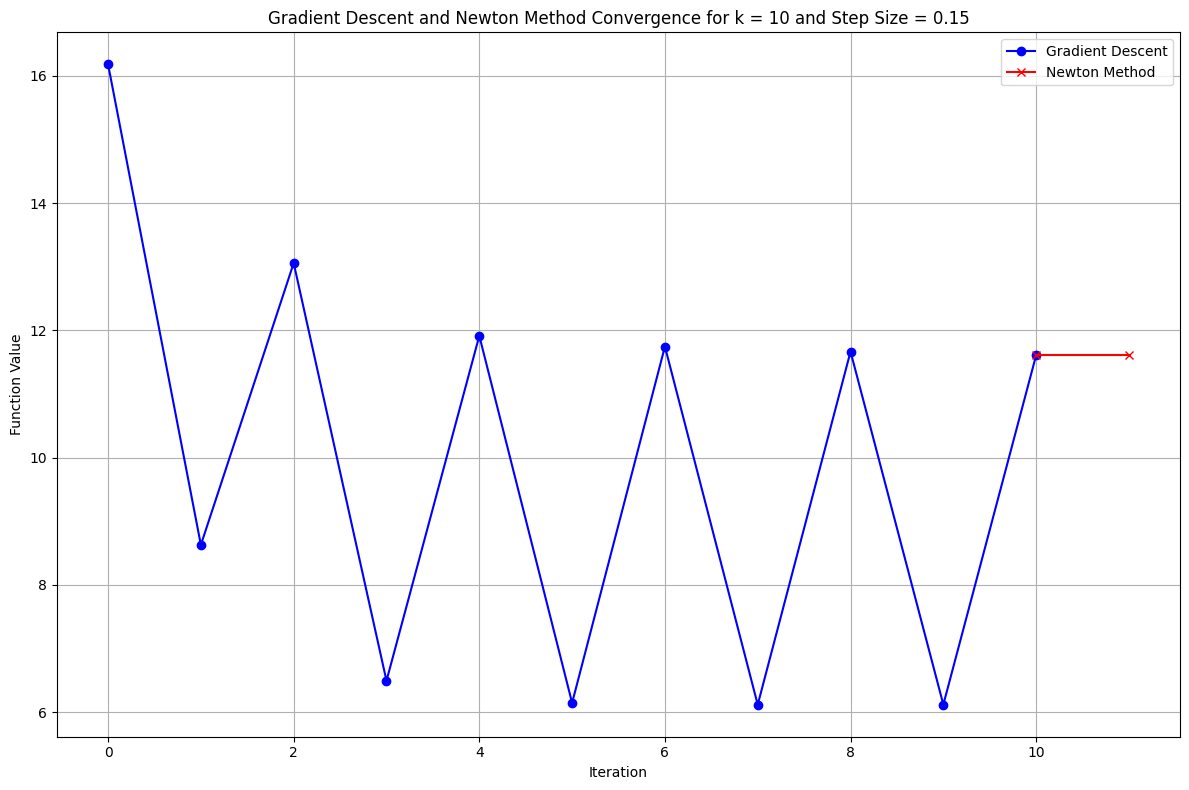

****************************************************************************************************
Step size: 0.15
k: 30
Final x: [            nan  1.09750483e-17  1.09750483e-17  1.09750483e-17
 -2.09225608e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.117578031416803


<Figure size 640x480 with 0 Axes>

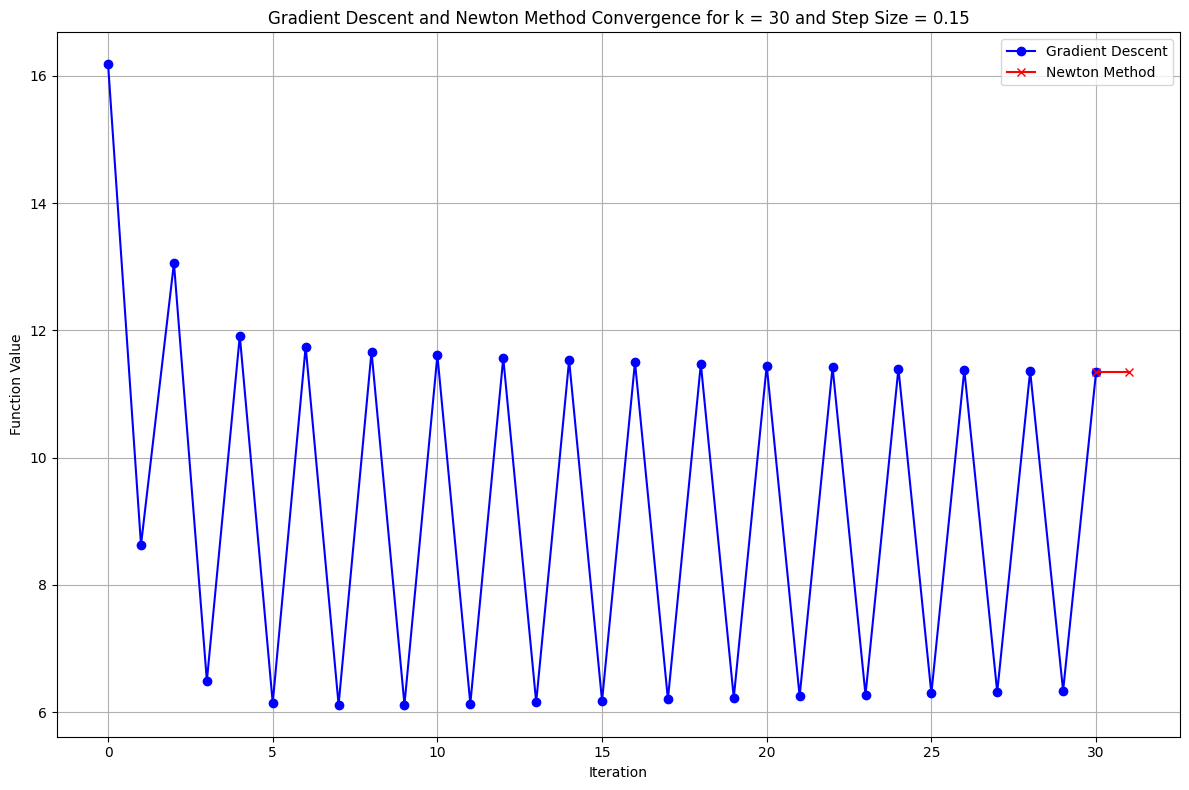

****************************************************************************************************
Step size: 0.15
k: 70
Final x: [            nan  1.09750358e-17  1.09750358e-17  1.09750358e-17
 -2.09894764e-17]
Final f(x): nan
gradient norm:  nan
Minimum of f3: 6.117578031416803


<Figure size 640x480 with 0 Axes>

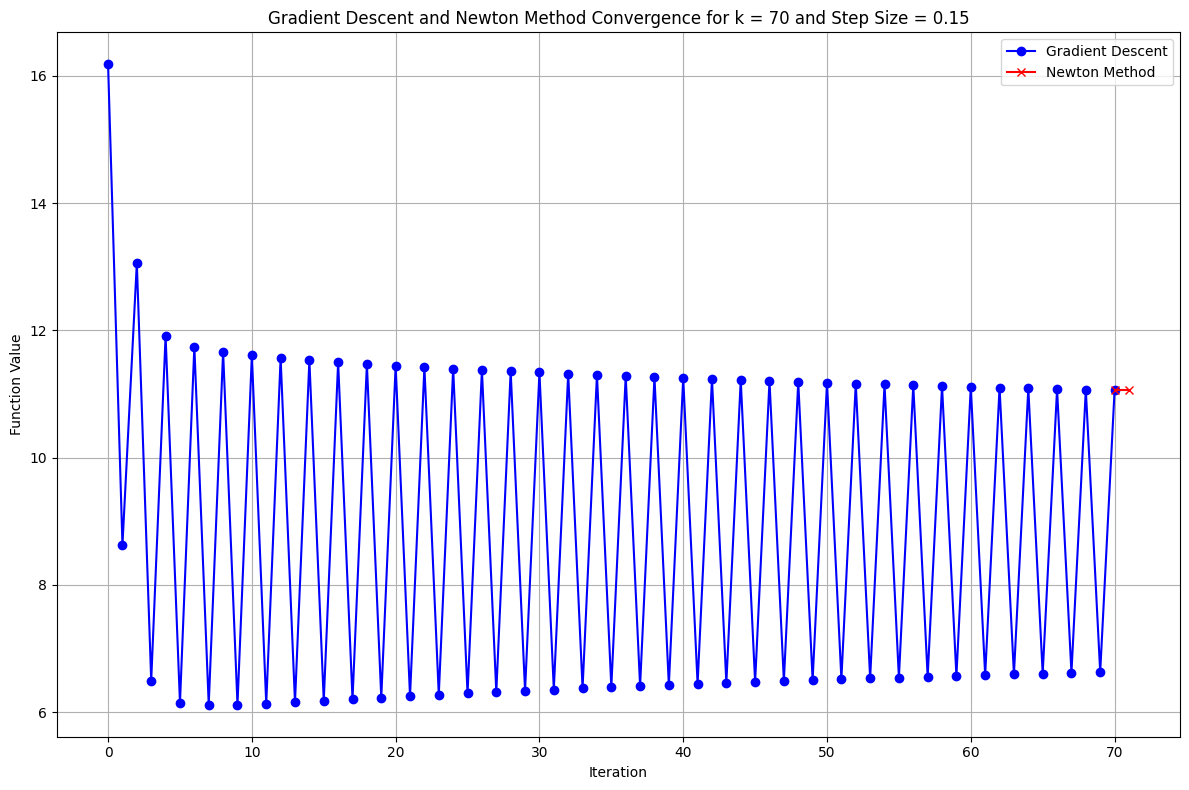

****************************************************************************************************
Step size: 0.15
k: 100
Final x: [9.04928761e-01 1.09750358e-17 1.09750358e-17 1.09750358e-17
 1.06805620e-07]
Final f(x): 10.916947653535876
gradient norm:  8.999998482347799
Minimum of f3: 6.117578031416803


<Figure size 640x480 with 0 Axes>

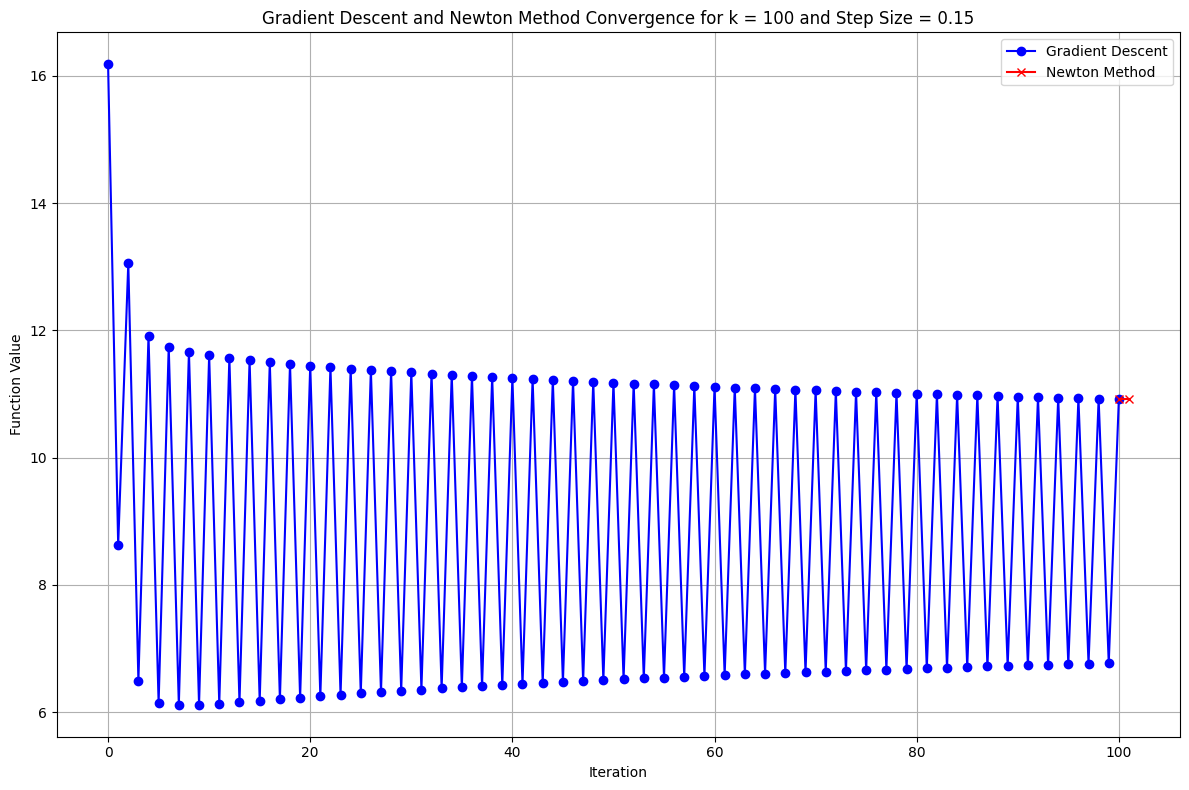

****************************************************************************************************


<Figure size 640x480 with 0 Axes>

In [149]:
# for each k in K, run gradient descent for k iterations and Newton's method for 100 - k iterations

for step_size_value in [0.01, 0.02, 0.1, 0.15]:
    for k in K:
        x, list = gradient_descent(f3_value, f3_gradient, x_0, step_size_value, [], k)
        x, list = Newton(f3_value, f3_Newton_update_term, x, list, 100 - k)
        print(f'Step size: {step_size_value}')
        print(f'k: {k}')
        print(f'Final x: {x}')
        print(f'Final f(x): {f3_value(x)}')
        print("gradient norm: ", np.linalg.norm(f3_gradient(x)))
        # Print the minimum value of f3
        min_f3 = min(list)
        print(f'Minimum of f3: {min_f3}')
        iterations = range(len(list))
        # plot the first k + 1 values of list with blue dots and the rest with red crosses
        plt.figure(figsize=(12, 8))
        plt.plot(iterations[:k + 1], list[:k + 1], 'bo-', label='Gradient Descent')
        plt.plot(iterations[k:], list[k:], 'rx-', label='Newton Method')
        plt.xlabel('Iteration')
        plt.ylabel('Function Value')
        plt.title(f'Gradient Descent and Newton Method Convergence for k = {k} and Step Size = {step_size_value}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        
        # Save the plot as a .png file with the name step_size_value_k.png
        plt.savefig(f'{step_size_value}_{k}.png')
        
        # Display the plot
        plt.show()
        
        print("*"*100)
        
        # Clear the current figure to ensure each iteration creates a new plot
        plt.clf()

In [150]:
x_0

array([1, 1, 1, 1, 1])

In [151]:
x_new = []
x_list = []
step_size_value = 0.02
k = 97

Step size: 0.02
k: 97
Final x: [ 4.54346768e-18  7.86195416e-18  7.86195416e-18  7.86195416e-18
 -3.51378383e-18]
Final f(x): 3.4657359027997265
Gradient norm:  0.0
Minimum of f3: 3.4657359027997265


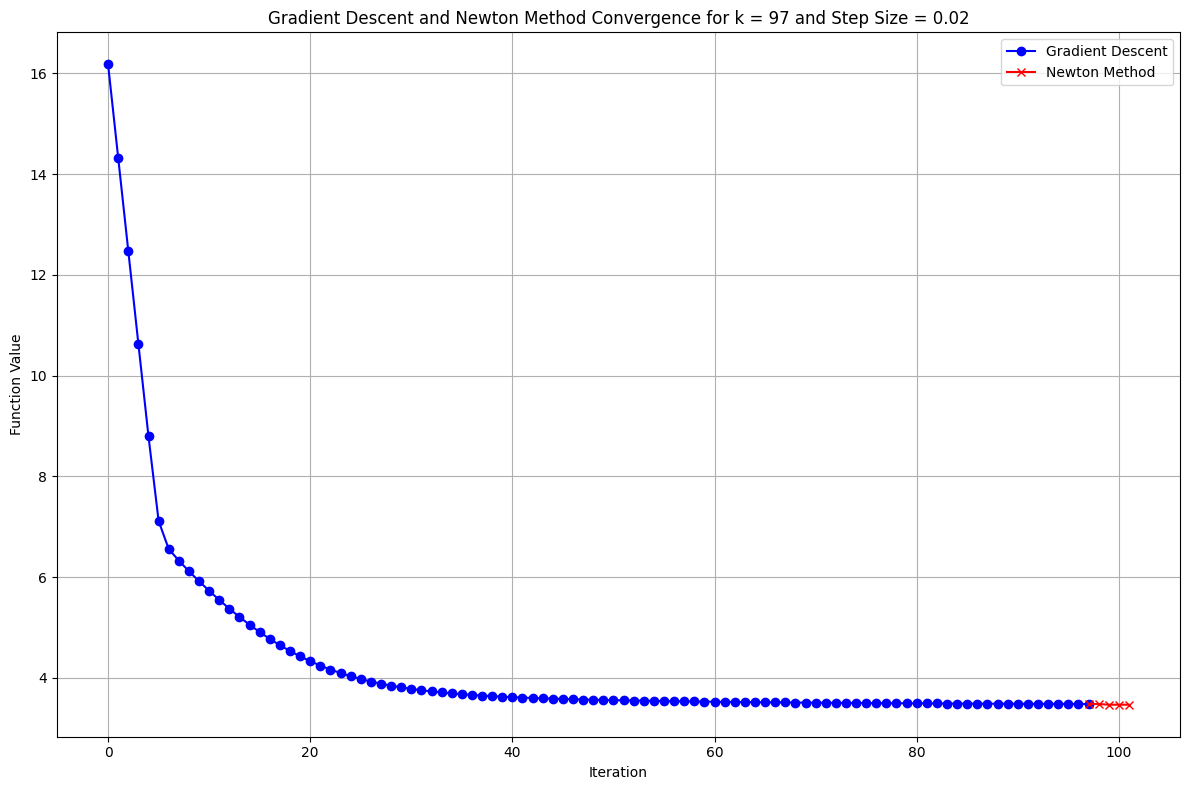

In [152]:
x_new, list_new = gradient_descent(f3_value, f3_gradient, x_0, step_size_value, [], k)
x_new, list_new = Newton(f3_value, f3_Newton_update_term, x_new, list_new, 100 - k)

print(f'Step size: {step_size_value}')
print(f'k: {k}')
print(f'Final x: {x_new}')
print(f'Final f(x): {f3_value(x_new)}')
print("Gradient norm: ", np.linalg.norm(f3_gradient(x_new)))

# Print the minimum value of f3
min_f3 = min(list_new)
print(f'Minimum of f3: {min_f3}')

# Plot the first k + 1 values with blue dots and the rest with red crosses
iterations = range(len(list_new))
plt.figure(figsize=(12, 8))
plt.plot(iterations[:k + 1], list_new[:k + 1], 'bo-', label='Gradient Descent')
plt.plot(iterations[k:], list_new[k:], 'rx-', label='Newton Method')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title(f'Gradient Descent and Newton Method Convergence for k = {k} and Step Size = {step_size_value}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("*"*100, "Problem 4", "*"*100)

# 4
## 2

In [153]:
# Remeber f2_value(x) returns f2(x) and 
# f2_gradient(x) returns the gradient of f2 at x

def custom_Newton_1(f, grad_f, x_0, max_iter):
    f_values = []
    x_values = []
    x_values.append(x_0)
    f_values.append(f(x_0))
    # x_0 is the initial point
    # Set initial hessian H_0 as identity matrix
    H = np.eye(len(x_0))
    # x_{k + 1} = x_k - H_k^{-1} * grad_f(x_k)
    # Update H_{k + 1} = (x_k - x_{k - 1})^T * (grad_f(x_k) - grad_f(x_{k - 1})) / (x_k - x_{k - 1})^T * (x_k - x_{k - 1})) * I
    
    for k in range(max_iter):
        # Calculate gradient at current point
        grad = grad_f(x_values[-1])
        
        # Update x as x - H^{-1} * grad
        x_new = x_values[-1] - np.linalg.inv(H) @ grad
        
        # Append new x and f(x) to their respective lists
        x_values.append(x_new)
        f_values.append(f(x_new))
        
        # If this is not the first iteration, update H
        if k > 0:
            # Calculate difference in x and gradient
            delta_x = x_values[-1] - x_values[-2]
            delta_grad = grad_f(x_values[-1]) - grad_f(x_values[-2])

            # If delta_x norm is 0, break
            if np.linalg.norm(delta_x) == 0:
                break
            
            # Compute scalar factor for H update
            scalar = np.dot(delta_x, delta_grad) / np.dot(delta_x, delta_x)
            
            # Update H
            H = scalar * np.eye(len(x_0))
    
    return x_values, f_values

In [154]:
x_0 = np.array([0, 0, 0, 0, 0])

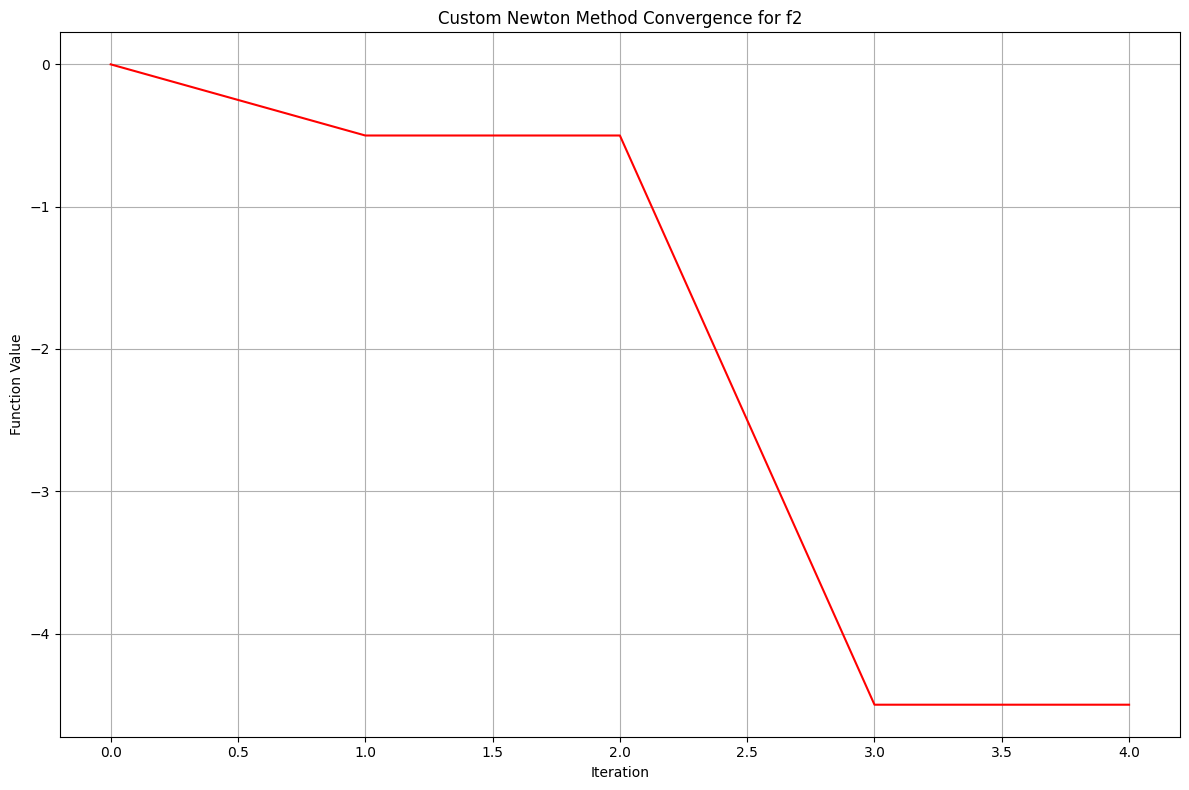

Minimum of f2 in Custom Newton method: -4.5
Gradient norm at the minimum value of f2 in Custom Newton method: 0.0
final x:  [1. 1. 1. 1. 1.]
Number of iterations to get gradient norm as 0:  3


In [155]:
# Run custom_Newton_1 on f2 and plot the values of f2

custom_Newton_1_x, custom_Newton_1_f_values = custom_Newton_1(f2_value, f2_gradient, x_0, 100)

iterations = range(len(custom_Newton_1_f_values))
plt.figure(figsize=(12, 8))
plt.plot(iterations, custom_Newton_1_f_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Custom Newton Method Convergence for f2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the gradient norm at the minimum value of f2 and minimum value of f2
min_f2 = min(custom_Newton_1_f_values)
min_f2_index = custom_Newton_1_f_values.index(min_f2)
min_f2_x = custom_Newton_1_x[min_f2_index]
min_f2_gradient = np.linalg.norm(f2_gradient(min_f2_x))
print(f'Minimum of f2 in Custom Newton method: {min_f2}')
print(f'Gradient norm at the minimum value of f2 in Custom Newton method: {min_f2_gradient}')
# print final x as the last element of custom_Newton_1_x
print("final x: ", custom_Newton_1_x[-1])
# number of iterations to get gradient norm as 0
num_iter = 0
for i in range(len(custom_Newton_1_x)):
    if np.linalg.norm(f2_gradient(custom_Newton_1_x[i])) == 0:
        num_iter = i
        break
print("Number of iterations to get gradient norm as 0: ", num_iter)

In [156]:
def custom_Newton_2(f, grad_f, x_0, max_iter):
    f_values = []
    x_values = []
    x_values.append(x_0)
    f_values.append(f(x_0))
    # x_0 is the initial point
    # Set initial inverse hessian H_0 as identity matrix
    H_inv = np.eye(len(x_0))
    # x_{k + 1} = x_k - H_k^{-1} * grad_f(x_k)
    # Update H_inv as (x_k - x_{k - 1})^T * (grad_f(x_k) - grad_f(x_{k - 1})) / (grad_f(x_k) - grad_f(x_{k - 1}))^T * (grad_f(x_k) - grad_f(x_{k - 1})) * I
    
    for k in range(max_iter):
        # Calculate gradient at current point
        grad = grad_f(x_values[-1])
        # Update x
        x_new = x_values[-1] - H_inv @ grad
        
        # Append new x and f(x) to their respective lists
        x_values.append(x_new)
        f_values.append(f(x_new))
        
        # If this is not the first iteration, update H_inv
        if k > 0:
            # Calculate difference in x and gradient
            delta_x = x_values[-1] - x_values[-2]
            delta_grad = grad_f(x_values[-1]) - grad_f(x_values[-2])

            # If delta_grad norm is 0, break
            if np.linalg.norm(delta_grad) == 0:
                break
            
            # Compute scalar factor for H_inv update
            scalar = np.dot(delta_x, delta_grad) / np.dot(delta_grad, delta_grad)
            
            
            # Update H_inv
            H_inv = scalar * np.eye(len(x_0))
    
    return x_values, f_values

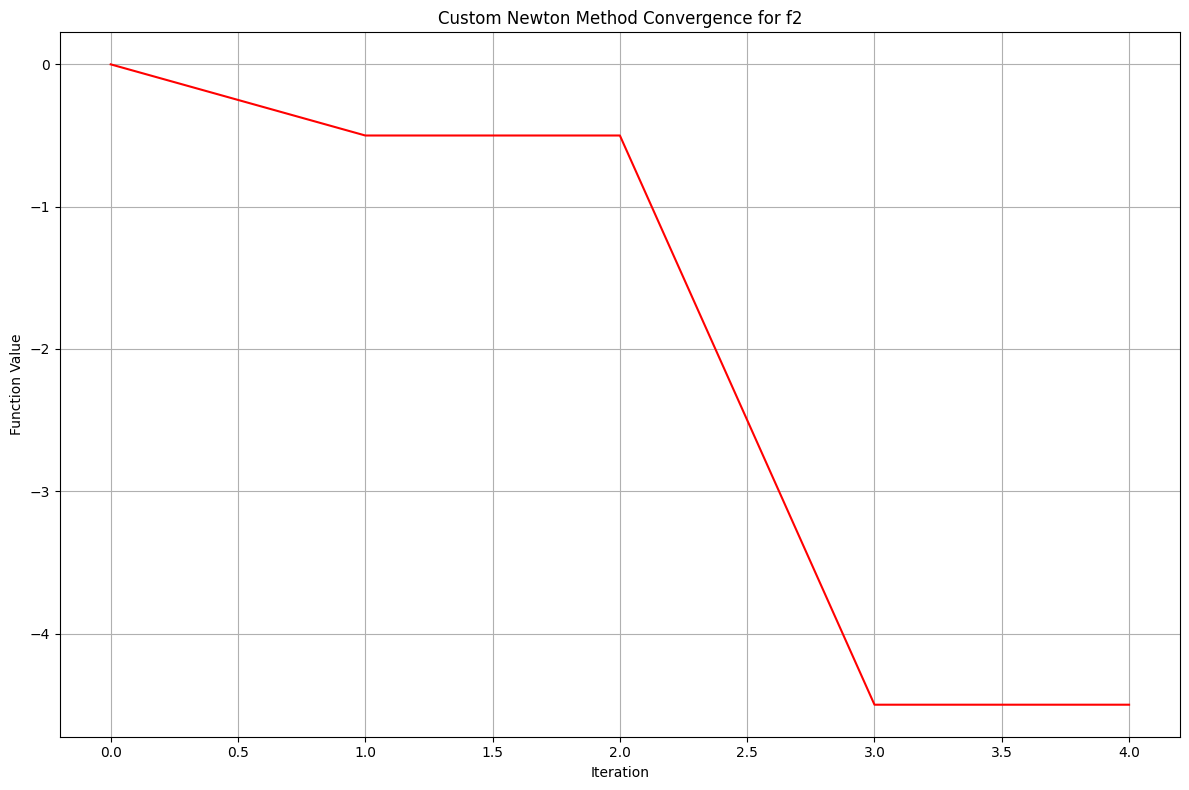

Minimum of f2 in Custom Newton method: -4.5
Gradient norm at the minimum value of f2 in Custom Newton method: 0.0
final x:  [1. 1. 1. 1. 1.]
Number of iterations to get gradient norm as 0:  3


In [157]:
custom_Newton_2_x, custom_Newton_2_f_values = custom_Newton_2(f2_value, f2_gradient, x_0, 100)

iterations = range(len(custom_Newton_2_f_values))
plt.figure(figsize=(12, 8))
plt.plot(iterations, custom_Newton_2_f_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Custom Newton Method Convergence for f2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the gradient norm at the minimum value of f2 and minimum value of f2
min_f2 = min(custom_Newton_2_f_values)
min_f2_index = custom_Newton_2_f_values.index(min_f2)
min_f2_x = custom_Newton_2_x[min_f2_index]
min_f2_gradient = np.linalg.norm(f2_gradient(min_f2_x))
print(f'Minimum of f2 in Custom Newton method: {min_f2}')
print(f'Gradient norm at the minimum value of f2 in Custom Newton method: {min_f2_gradient}')
# print final x as the last element of custom_Newton_2_x
print("final x: ", custom_Newton_2_x[-1])
# number of iterations to get gradient norm as 0
num_iter = 0
for i in range(len(custom_Newton_2_x)):
    if np.linalg.norm(f2_gradient(custom_Newton_2_x[i])) == 0:
        num_iter = i
        break
print("Number of iterations to get gradient norm as 0: ", num_iter)

In [158]:
def Quasi_Newton_Rank_1(f, grad_f, x_0, max_iter):
    f_values = []
    x_values = []
    x_values.append(x_0)
    f_values.append(f(x_0))
    # x_0 is the initial point
    # Set initial inverse hessian H_0 as identity matrix
    H_inv = np.eye(len(x_0))
    # x_{k + 1} = x_k - H_k^{-1} * grad_f(x_k)
    # Update H_inv as H_inv = H_inv + c *u*u^T
    # where u = delta_x - H_inv * delta_grad
    # c = 1 / (delta_grad^T * delta_x)

    for k in range(max_iter):
        # Calculate gradient at current point
        grad = grad_f(x_values[-1])
        
        # Update x
        x_new = x_values[-1] - H_inv @ grad
        
        # Append new x and f(x) to their respective lists
        x_values.append(x_new)
        f_values.append(f(x_new))
        
        # If this is not the first iteration, update H_inv
        if k > 0:
            # Calculate difference in x and gradient
            delta_x = x_values[-1] - x_values[-2]
            delta_grad = grad_f(x_values[-1]) - grad_f(x_values[-2])
            
            # Calculate u
            u = delta_x - H_inv @ delta_grad

            if np.dot(delta_grad, u) == 0:
                break
            
            # Calculate c as /u^T * delta_grad
            c = 1 / np.dot(u, delta_grad)
            
            # Update H_inv
            H_inv = H_inv + c * np.outer(u, u)

    return x_values, f_values

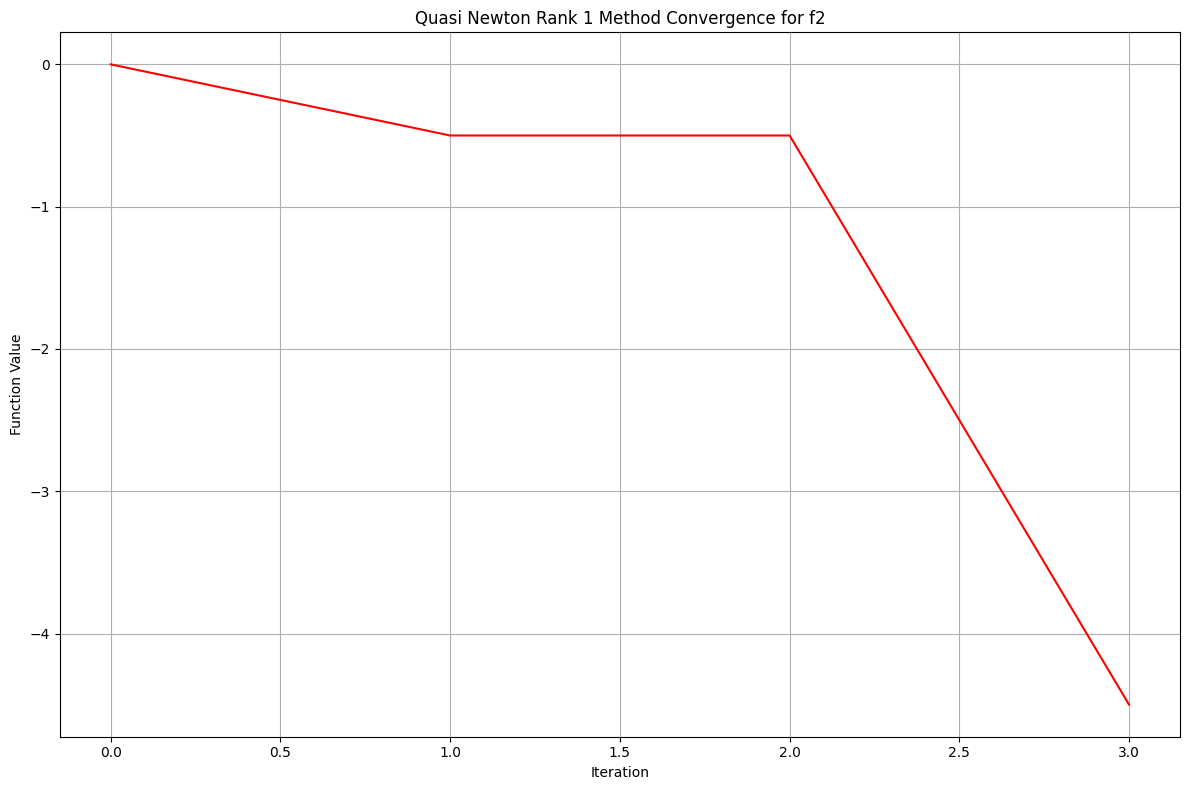

Minimum of f2 in Quasi Newton Rank 1 method: -4.5
Gradient norm at the minimum value of f2 in Quasi Newton Rank 1 method: 0.0
final x:  [1. 1. 1. 1. 1.]
Number of iterations to get gradient norm as 0:  3


In [159]:
Quasi_Newton_Rank_1_x, Quasi_Newton_Rank_1_f_values = Quasi_Newton_Rank_1(f2_value, f2_gradient, x_0, 100)

iterations = range(len(Quasi_Newton_Rank_1_f_values))
plt.figure(figsize=(12, 8))
plt.plot(iterations, Quasi_Newton_Rank_1_f_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Quasi Newton Rank 1 Method Convergence for f2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the gradient norm at the minimum value of f2 and minimum value of f2
min_f2 = min(Quasi_Newton_Rank_1_f_values)
min_f2_index = Quasi_Newton_Rank_1_f_values.index(min_f2)
min_f2_x = Quasi_Newton_Rank_1_x[min_f2_index]
min_f2_gradient = np.linalg.norm(f2_gradient(min_f2_x))
print(f'Minimum of f2 in Quasi Newton Rank 1 method: {min_f2}')
print(f'Gradient norm at the minimum value of f2 in Quasi Newton Rank 1 method: {min_f2_gradient}')
# print final x as the last element of Quasi_Newton_Rank_1_x
print("final x: ", Quasi_Newton_Rank_1_x[-1])

# number of iterations to get gradient norm as 0
num_iter = 0
for i in range(len(Quasi_Newton_Rank_1_x)):
    if np.linalg.norm(f2_gradient(Quasi_Newton_Rank_1_x[i])) == 0:
        num_iter = i
        break
print("Number of iterations to get gradient norm as 0: ", num_iter)